# Feature Engineering Notebook

## Objectives

This notebook covers the full feature engineering process applied to the cleaned housing dataset. Feature engineering is a critical step in preparing the data for machine learning, as it transforms raw variables into a format that improves the model’s ability to learn patterns.

We will address:

* Enconding of categorical variables.

* Normalization of skewed numerical variables.

* Evaluation of transformation effects via visualization


## Inputs

* outputs/datasets/cleaned/TestSetCleaned.csv
* outputs/datasets/cleaned/TraintSetCleaned.csv
* outputs/datasets/cleaned/clean_inherited_houses.csv
* outputs/datasets/cleaned/clean_house_price_records.csv

## Outputs

* List of engineered variables to use in our model.

---

# Change working directory

We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Sales-House-Price-Estimate/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Sales-House-Price-Estimate'

---

# Load Cleaned Data

Train Set:

In [4]:
import pandas as pd

TrainSet = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", keep_default_na=False)
TrainSet.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1828         0             3           Av          48         None   
1       894         0             2           No           0          Unf   
2       964         0             2           No         713          ALQ   
3      1689         0             3           No        1218          GLQ   
4      1541         0             3           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0       1774         774          Unf         2007  ...    11694          90   
1        894         308         None         1962  ...     6600          60   
2        163         432          Unf         1921  ...    13360          80   
3        350         857          RFn         2002  ...    13265          69   
4       1541         843          RFn         2001  ...    13704         118   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         452          108            5            9         1822       2007   
1           0            0            5            5          894       1962   
2           0            0            7            5          876       1921   
3         148           59            5            8         1568       2002   
4         150           81            5            7         1541       2001   

   YearRemodAdd  SalePrice  
0          2007     314813  
1          1962     109500  
2          2006     163500  
3          2002     271000  
4          2002     205000  

[5 rows x 22 columns]

Test Set:

In [5]:
TestSet = pd.read_csv("outputs/datasets/cleaned/TestSetCleaned.csv", keep_default_na=False)
TestSet.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2515         0             4           No        1219          Rec   
1       958       620             3           No         403          BLQ   
2       979       224             3           No         185          LwQ   
3      1156       866             4           No         392          BLQ   
4       525         0             3           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        816         484         None         1975  ...    32668          69   
1        238         240          Unf         1941  ...     9490          79   
2        524         352          Unf         1950  ...     7015          69   
3        768         505          Fin         1977  ...    10005          83   
4        525         264          Unf         1971  ...     1680          21   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0           0            0            3            6         2035       1957   
1           0            0            7            6          806       1941   
2         161            0            4            5          709       1950   
3         299          117            5            7         1160       1977   
4         381            0            5            6          525       1971   

   YearRemodAdd  SalePrice  
0          1975     200624  
1          1950     133000  
2          1950     110000  
3          1977     192000  
4          1971      88000  

[5 rows x 22 columns]

---

# Data Exploration

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1stFlrSF      1168 non-null   int64 
 1   2ndFlrSF      1168 non-null   int64 
 2   BedroomAbvGr  1168 non-null   int64 
 3   BsmtExposure  1168 non-null   object
 4   BsmtFinSF1    1168 non-null   int64 
 5   BsmtFinType1  1168 non-null   object
 6   BsmtUnfSF     1168 non-null   int64 
 7   GarageArea    1168 non-null   int64 
 8   GarageFinish  1168 non-null   object
 9   GarageYrBlt   1168 non-null   int64 
 10  GrLivArea     1168 non-null   int64 
 11  KitchenQual   1168 non-null   object
 12  LotArea       1168 non-null   int64 
 13  LotFrontage   1168 non-null   int64 
 14  MasVnrArea    1168 non-null   int64 
 15  OpenPorchSF   1168 non-null   int64 
 16  OverallCond   1168 non-null   int64 
 17  OverallQual   1168 non-null   int64 
 18  TotalBsmtSF   1168 non-null   int64 
 19  YearBu

---

# Feature Engineering

Now we assess whether distribution transformations (e.g. log, Yeo-Johnson) could help normalize variables and benefit certain algorithms.

We will use custom function to preview the effect of various transformations, to whom I added the function to calculate Skewness and Kurtosis, for a better visualisation of the effect of the transformations applied to each variable. (**Code Institute credits**)

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")

def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")

def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()
    calculate_skew_kurtosis(df, variable, moment={f"{variable}"})


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

### Feature Engineering Spreadsheet Summary

To keep things tidy, I have filled in a separate spreadsheet to plan ahead possible transformations needed.

![Feature Engineering Spreadsheet](../images/FeatureEngineeringSpreadsheetC.png)

### Dealing with Feature Engineering

#### Categorical Encoding - Ordinal: replaces categories with ordinal numbers

* We are now listing categorical variables that will be Ordinal Encoded using the 'arbitrary" method.

In [9]:
categorical_vars = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
categorical_vars

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

* Then, create a separate DataFrame, with these variables.

In [10]:
df_eng = TrainSet[categorical_vars].copy()
df_eng.head(10)

BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0           Av         None          Unf          Gd
1           No          Unf         None          TA
2           No          ALQ          Unf          TA
3           No          GLQ          RFn          Gd
4           No          Unf          RFn          Gd
5           No          GLQ          RFn          Gd
6           No          Rec         None          TA
7           No          ALQ          Unf          Gd
8           Gd          GLQ          Unf          TA
9           No          ALQ          Unf          TA

* Further, we create engineered variables by applying the transformations, assess engineered variables distribution and select the most suitable method for each variable.

* Variable Analyzed: BsmtExposure
* Applied transformation: ['BsmtExposure_ordinal_encoder'] 



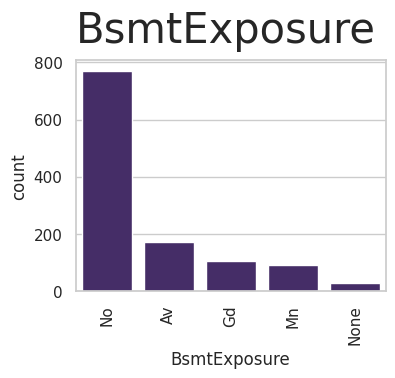

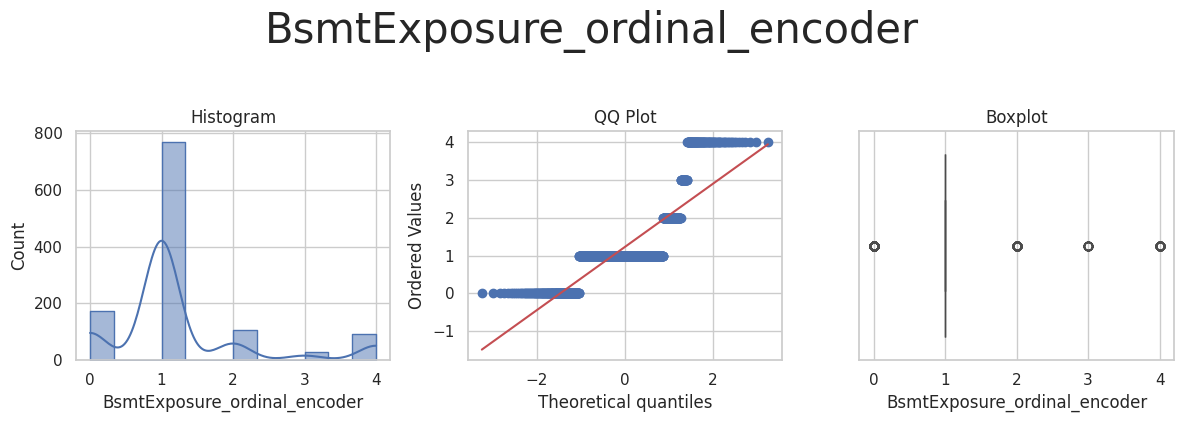

{'BsmtExposure_ordinal_encoder'}  | skewness: 1.59 | kurtosis: 2.36


* Variable Analyzed: BsmtFinType1
* Applied transformation: ['BsmtFinType1_ordinal_encoder'] 



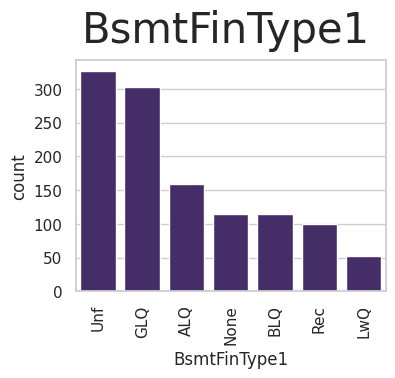

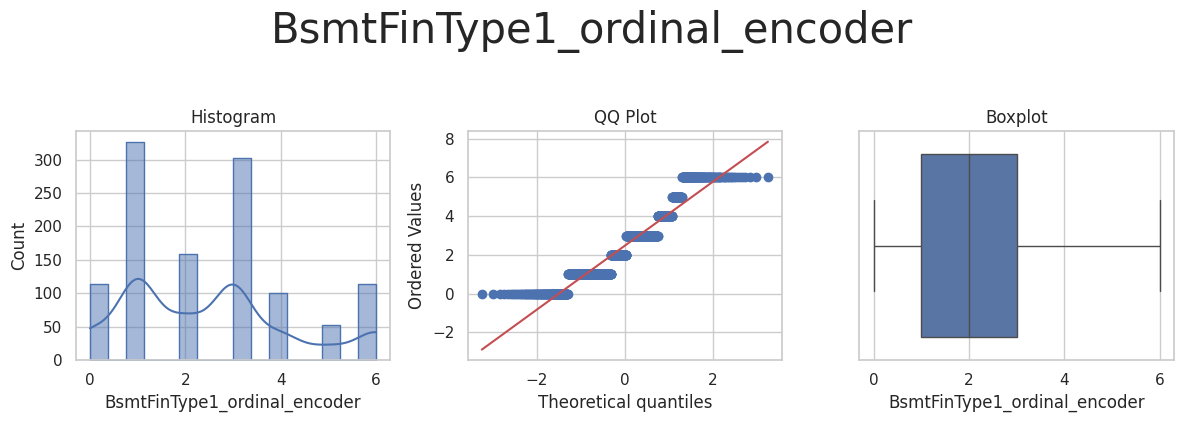

{'BsmtFinType1_ordinal_encoder'}  | skewness: 0.56 | kurtosis: -0.53


* Variable Analyzed: GarageFinish
* Applied transformation: ['GarageFinish_ordinal_encoder'] 



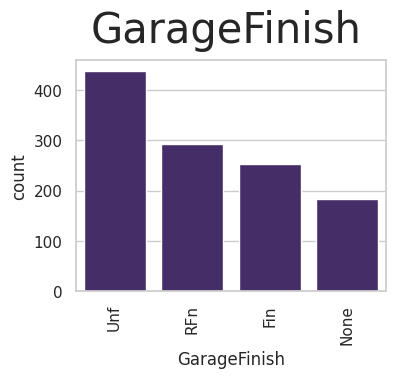

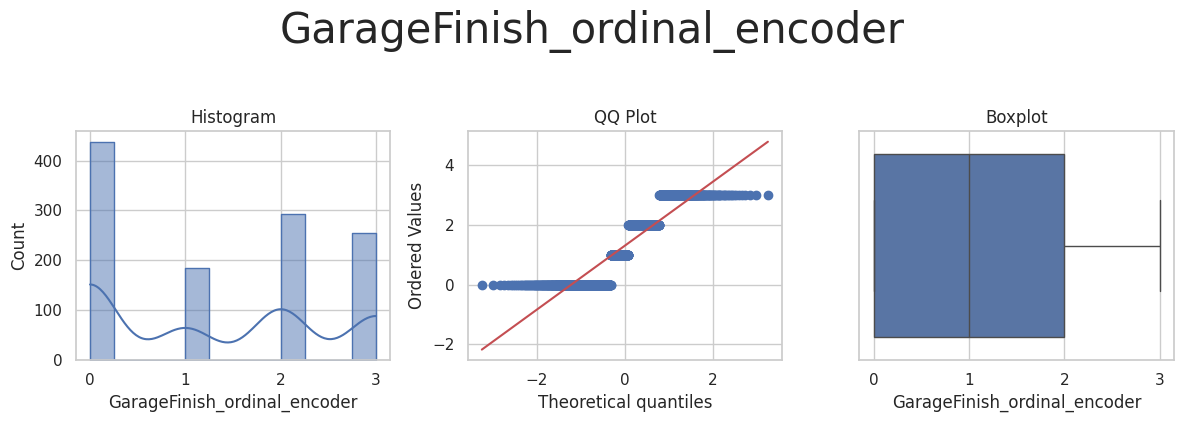

{'GarageFinish_ordinal_encoder'}  | skewness: 0.17 | kurtosis: -1.5


* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_ordinal_encoder'] 



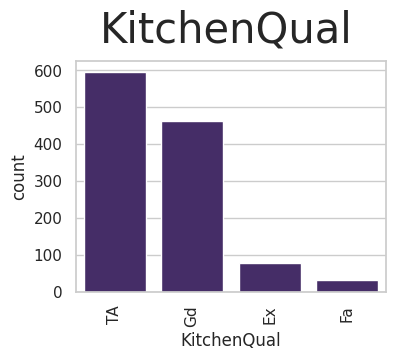

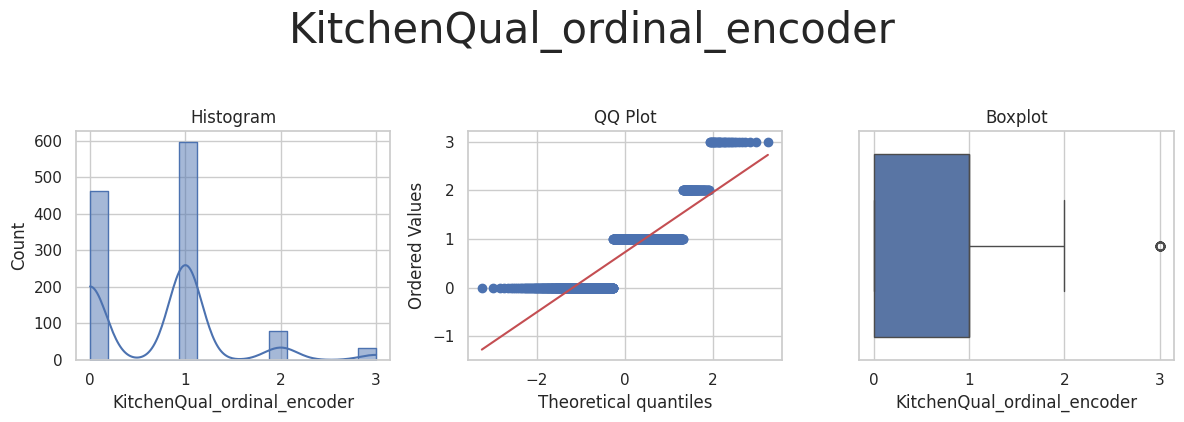

{'KitchenQual_ordinal_encoder'}  | skewness: 0.91 | kurtosis: 1.15




In [11]:
%matplotlib inline
# Pass only the original categorical features to avoid conflicts with already transformed columns
df_eng = FeatureEngineeringAnalysis(df=df_eng[categorical_vars], analysis_type='ordinal_encoder') 

* Apply the selected transformation to the Train and Test set

In [12]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables = categorical_vars)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


* Check TrainSet and TestSet to make sure transformation worked accordingly

In [13]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   1stFlrSF      1168 non-null   int64
 1   2ndFlrSF      1168 non-null   int64
 2   BedroomAbvGr  1168 non-null   int64
 3   BsmtExposure  1168 non-null   int64
 4   BsmtFinSF1    1168 non-null   int64
 5   BsmtFinType1  1168 non-null   int64
 6   BsmtUnfSF     1168 non-null   int64
 7   GarageArea    1168 non-null   int64
 8   GarageFinish  1168 non-null   int64
 9   GarageYrBlt   1168 non-null   int64
 10  GrLivArea     1168 non-null   int64
 11  KitchenQual   1168 non-null   int64
 12  LotArea       1168 non-null   int64
 13  LotFrontage   1168 non-null   int64
 14  MasVnrArea    1168 non-null   int64
 15  OpenPorchSF   1168 non-null   int64
 16  OverallCond   1168 non-null   int64
 17  OverallQual   1168 non-null   int64
 18  TotalBsmtSF   1168 non-null   int64
 19  YearBuilt     1168 non-null

In [14]:
TestSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   1stFlrSF      292 non-null    int64
 1   2ndFlrSF      292 non-null    int64
 2   BedroomAbvGr  292 non-null    int64
 3   BsmtExposure  292 non-null    int64
 4   BsmtFinSF1    292 non-null    int64
 5   BsmtFinType1  292 non-null    int64
 6   BsmtUnfSF     292 non-null    int64
 7   GarageArea    292 non-null    int64
 8   GarageFinish  292 non-null    int64
 9   GarageYrBlt   292 non-null    int64
 10  GrLivArea     292 non-null    int64
 11  KitchenQual   292 non-null    int64
 12  LotArea       292 non-null    int64
 13  LotFrontage   292 non-null    int64
 14  MasVnrArea    292 non-null    int64
 15  OpenPorchSF   292 non-null    int64
 16  OverallCond   292 non-null    int64
 17  OverallQual   292 non-null    int64
 18  TotalBsmtSF   292 non-null    int64
 19  YearBuilt     292 non-null   

**Done! All categorical variables are now integers.**

## Post Ordinal Encoding Correlation Study

Prior to proceeding with the numerical transformation, to optimize time and resources, we will do an additional Correlation Study and Exploratory Data Analysis on selected variables.

In [15]:
import ppscore as pps
# Compute Pearson correlations with SalePrice
corr_pearson = TrainSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
print("Pearson Variables Correlations with SalePrice:\n",corr_pearson)
print('\n')
# Compute Pearson correlations with SalePrice
corr_spearman = TrainSet.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
print("Spearman Variables Correlations with SalePrice:\n",corr_spearman)
# pps
pps_matrix_raw = pps.matrix(TrainSet)
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')
pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
print("\nPPS threshold - check PPS score IQR to decide threshold for heatmap \n")
print(pps_score_stats.round(3))

Pearson Variables Correlations with SalePrice:
 OverallQual     0.790636
GrLivArea       0.721707
GarageArea      0.646603
TotalBsmtSF     0.635535
1stFlrSF        0.620740
YearBuilt       0.521242
YearRemodAdd    0.517822
MasVnrArea      0.487600
GarageFinish    0.462485
BsmtFinSF1      0.401390
Name: SalePrice, dtype: float64


Spearman Variables Correlations with SalePrice:
 OverallQual     0.802395
GrLivArea       0.732180
GarageArea      0.663543
YearBuilt       0.646465
GarageYrBlt     0.634184
TotalBsmtSF     0.596989
YearRemodAdd    0.574195
1stFlrSF        0.573961
GarageFinish    0.535508
OpenPorchSF     0.474517
Name: SalePrice, dtype: float64



PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.038  0.091  0.0  0.0  0.0  0.029  0.873


* Let's merge the pearson and spearman correlations. We use set to avoid duplication of variables.

In [16]:
# Combine values in one DataFrame
combined = pd.concat([
    corr_pearson.rename('pearson'),
    corr_spearman.rename('spearman')
], axis=1)

# Calculate max correlation values
combined['max_corr'] = combined.abs().max(axis=1)
combined_sorted = combined.sort_values('max_corr', ascending=False)
vars_to_study = combined_sorted.head(10).index.to_list()

print(combined_sorted.head(10))
print("\nTop 10 variables:", vars_to_study)

               pearson  spearman  max_corr
OverallQual   0.790636  0.802395  0.802395
GrLivArea     0.721707  0.732180  0.732180
GarageArea    0.646603  0.663543  0.663543
YearBuilt     0.521242  0.646465  0.646465
TotalBsmtSF   0.635535  0.596989  0.635535
GarageYrBlt        NaN  0.634184  0.634184
1stFlrSF      0.620740  0.573961  0.620740
YearRemodAdd  0.517822  0.574195  0.574195
GarageFinish  0.462485  0.535508  0.535508
MasVnrArea    0.487600       NaN  0.487600

Top 10 variables: ['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'YearRemodAdd', 'GarageFinish', 'MasVnrArea']


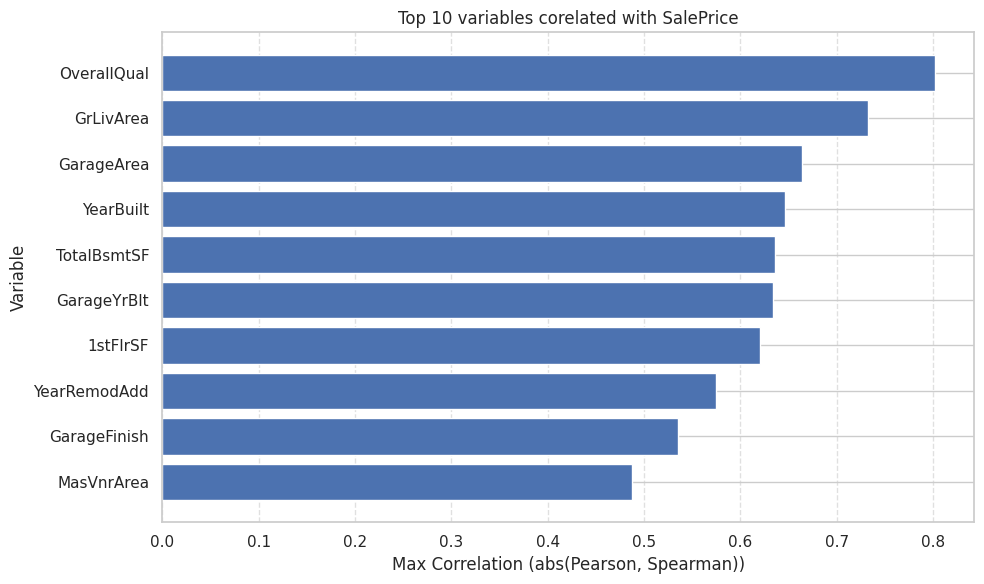

In [17]:
top10 = combined_sorted.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10.index[::-1], top10['max_corr'][::-1])
plt.xlabel('Max Correlation (abs(Pearson, Spearman))')
plt.ylabel('Variable')
plt.title('Top 10 variables corelated with SalePrice')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Numerical Transformation

We are now starting to check for outliers, find the best transformer, and choose our final engineered variables for modelling.
* We only apply transformations to our top 8 variables with max correlation value with ```SalePrice```.

In [ ]:
vars_eng = ['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'YearRemodAdd']
vars_eng

['OverallQual',
 'GrLivArea',
 'GarageArea',
 'YearBuilt',
 'TotalBsmtSF',
 'GarageYrBlt',
 '1stFlrSF',
 'YearRemodAdd']

* Create a separate DataFrame only with Selected Numerical Variables

In [19]:
df_eng = TrainSet[vars_eng].copy()
df_eng.head(10)

OverallQual  GrLivArea  GarageArea  YearBuilt  TotalBsmtSF  GarageYrBlt  \
0            9       1828         774       2007         1822         2007   
1            5        894         308       1962          894         1962   
2            5        964         432       1921          876         1921   
3            8       1689         857       2002         1568         2002   
4            7       1541         843       2001         1541         2001   
5            7       1221         400       2004         1221         2004   
6            6       1324         440       1965         1088         1965   
7            7       1416         484       1999          696         1999   
8            4        988         297       1973          462         1973   
9            6       1218         440       1941          735         2003   

   1stFlrSF  YearRemodAdd  
0      1828          2007  
1       894          1962  
2       964          2006  
3      1689          2002  
4      1541          2002  
5      1221          2005  
6      1324          1965  
7       696          1999  
8       526          1973  
9       869          1950

* Create engineered variables by applying the transformations, assess engineered variables distribution and select the most suitable method.

* Variable Analyzed: OverallQual
* Applied transformation: ['OverallQual_log_e', 'OverallQual_log_10', 'OverallQual_reciprocal', 'OverallQual_power', 'OverallQual_box_cox', 'OverallQual_yeo_johnson'] 



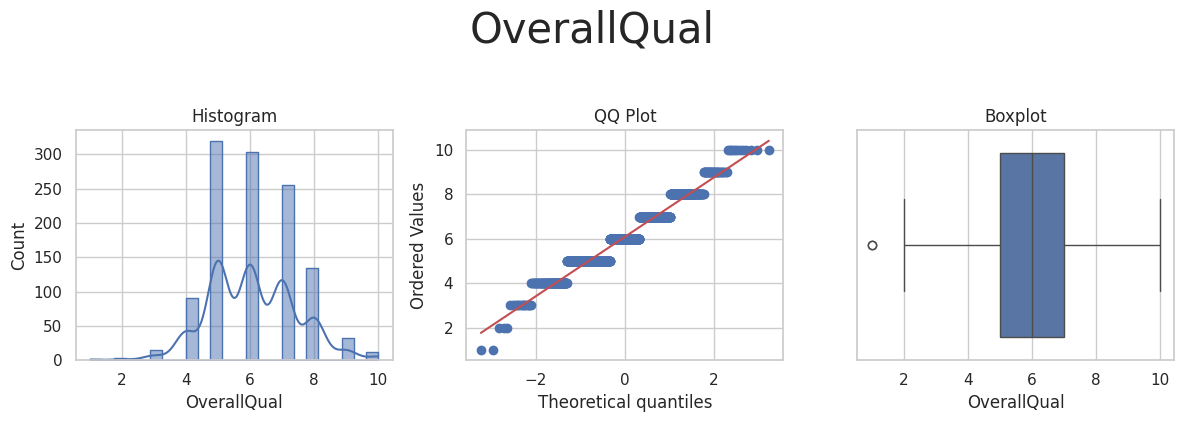

{'OverallQual'}  | skewness: 0.17 | kurtosis: 0.15




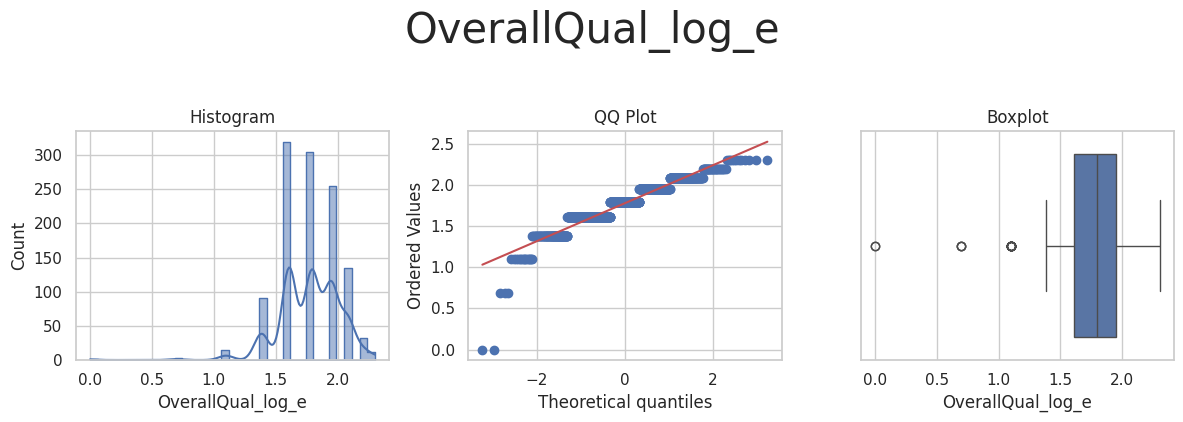

{'OverallQual_log_e'}  | skewness: -1.09 | kurtosis: 5.31




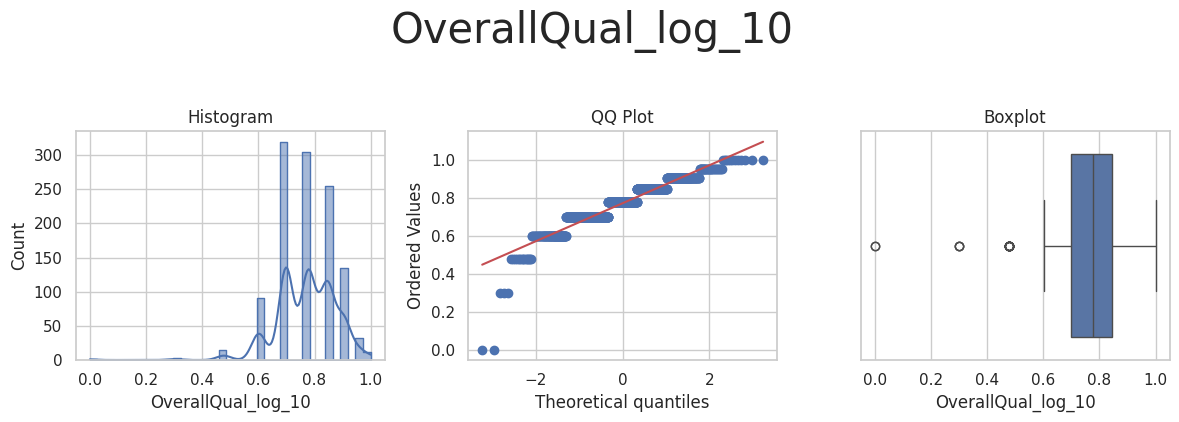

{'OverallQual_log_10'}  | skewness: -1.09 | kurtosis: 5.31




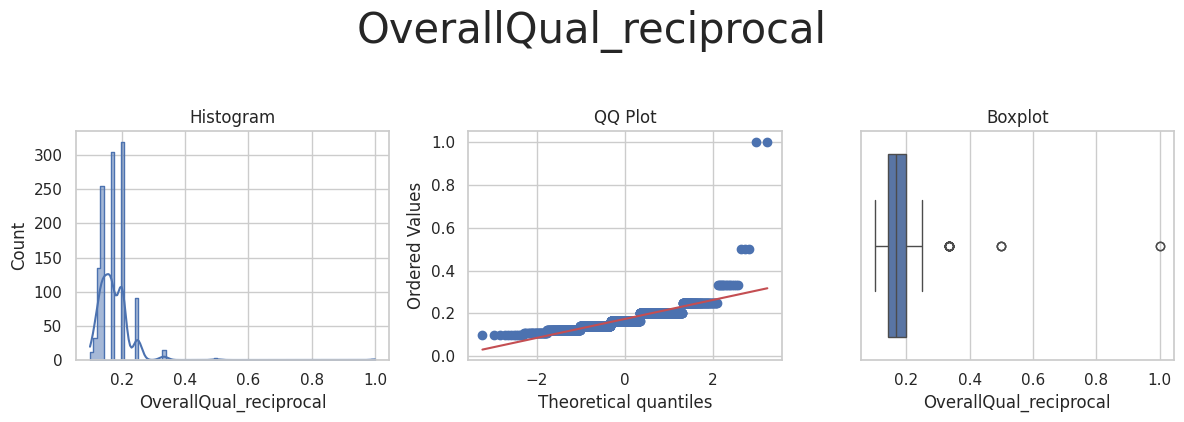

{'OverallQual_reciprocal'}  | skewness: 6.53 | kurtosis: 86.17




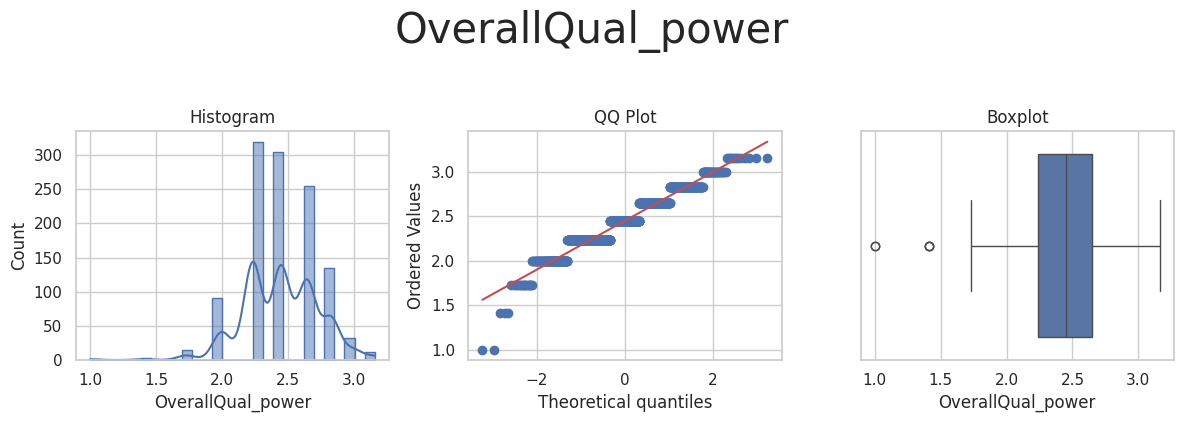

{'OverallQual_power'}  | skewness: -0.3 | kurtosis: 1.04




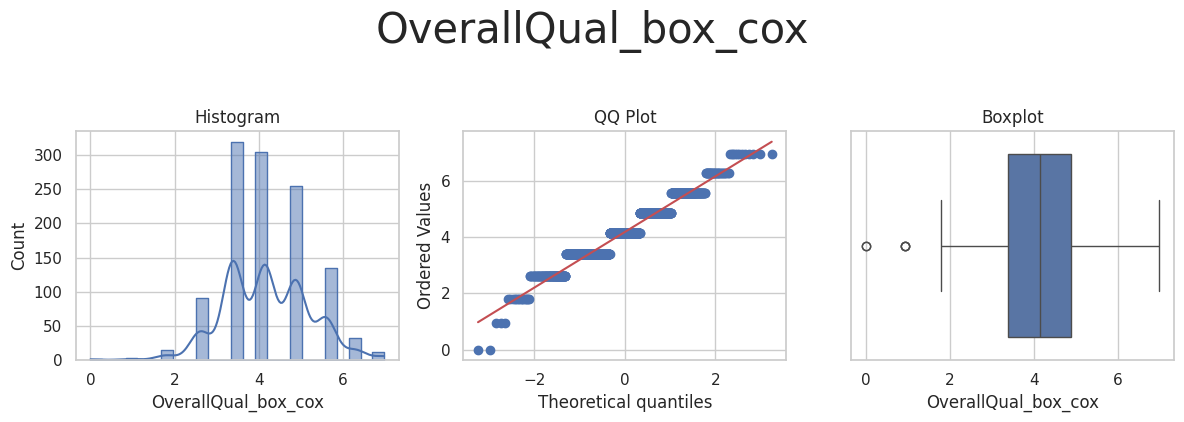

{'OverallQual_box_cox'}  | skewness: 0.03 | kurtosis: 0.28




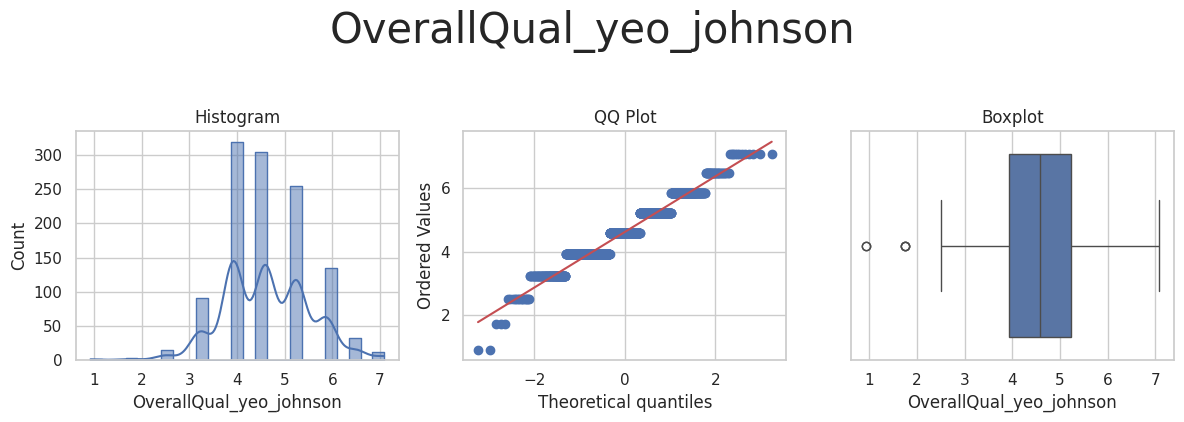

{'OverallQual_yeo_johnson'}  | skewness: 0.02 | kurtosis: 0.28


* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



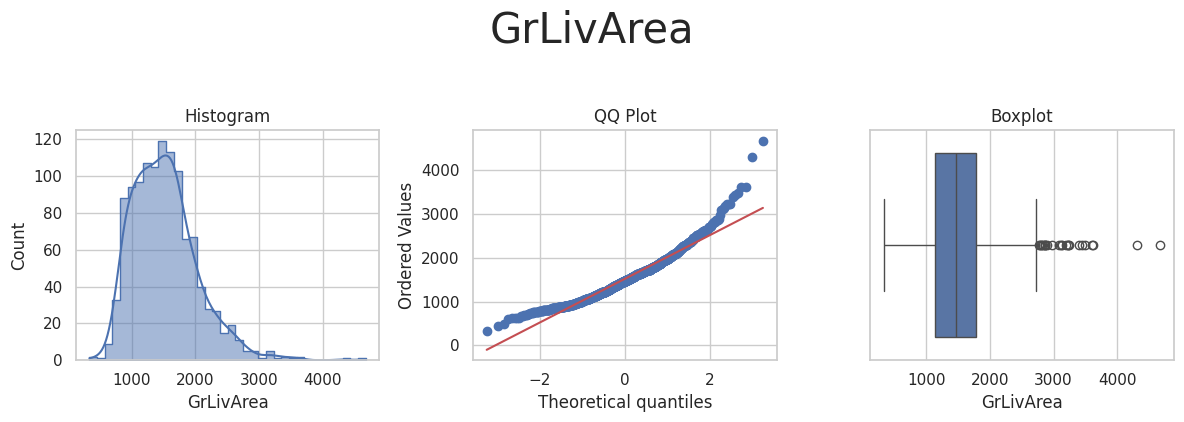

{'GrLivArea'}  | skewness: 1.08 | kurtosis: 2.54




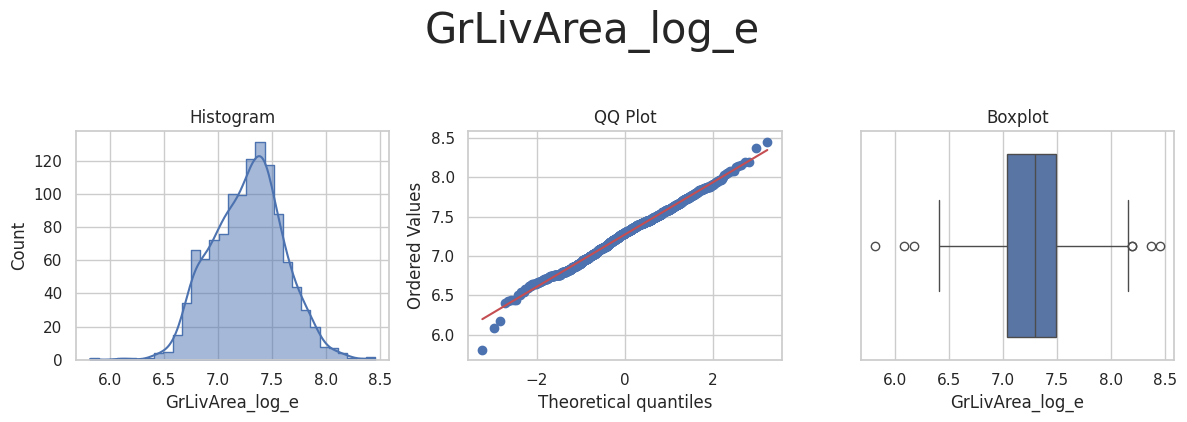

{'GrLivArea_log_e'}  | skewness: -0.07 | kurtosis: 0.17




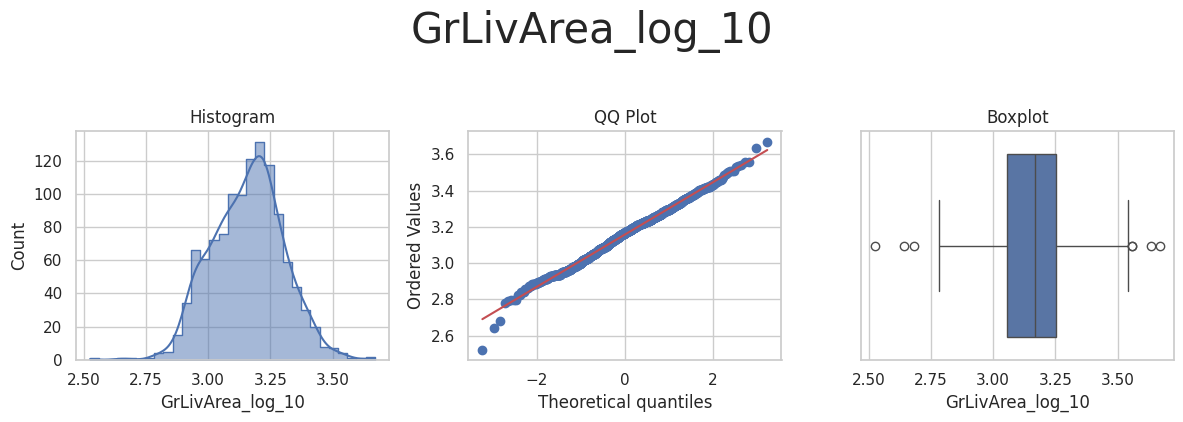

{'GrLivArea_log_10'}  | skewness: -0.07 | kurtosis: 0.17




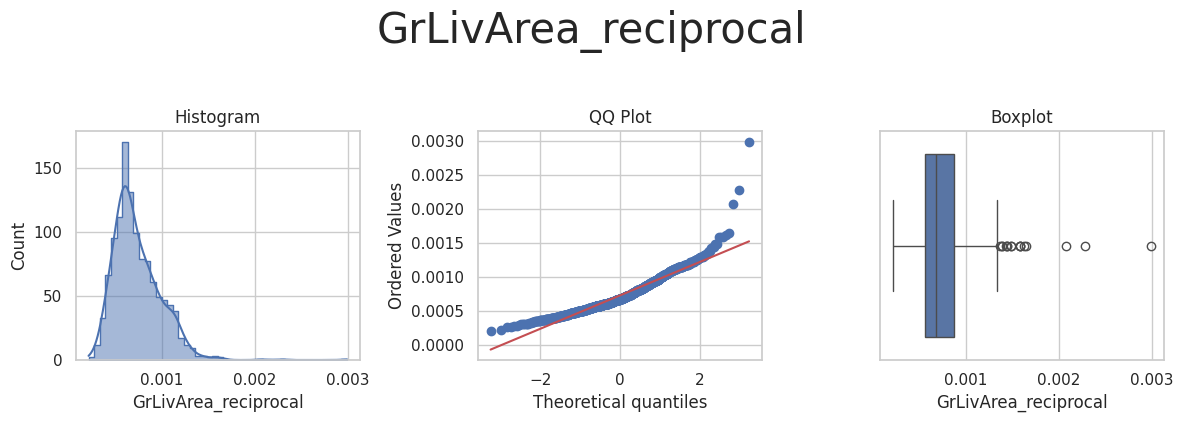

{'GrLivArea_reciprocal'}  | skewness: 1.49 | kurtosis: 6.6




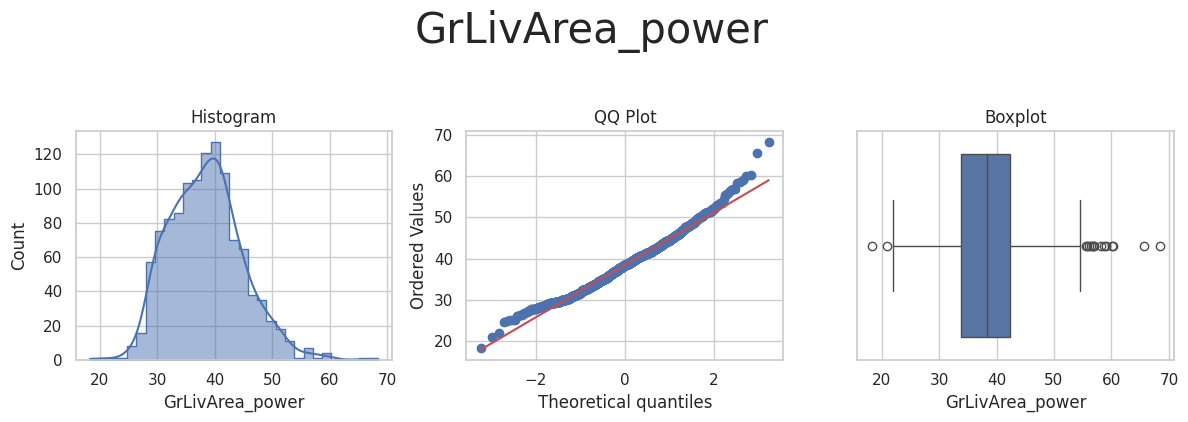

{'GrLivArea_power'}  | skewness: 0.47 | kurtosis: 0.6




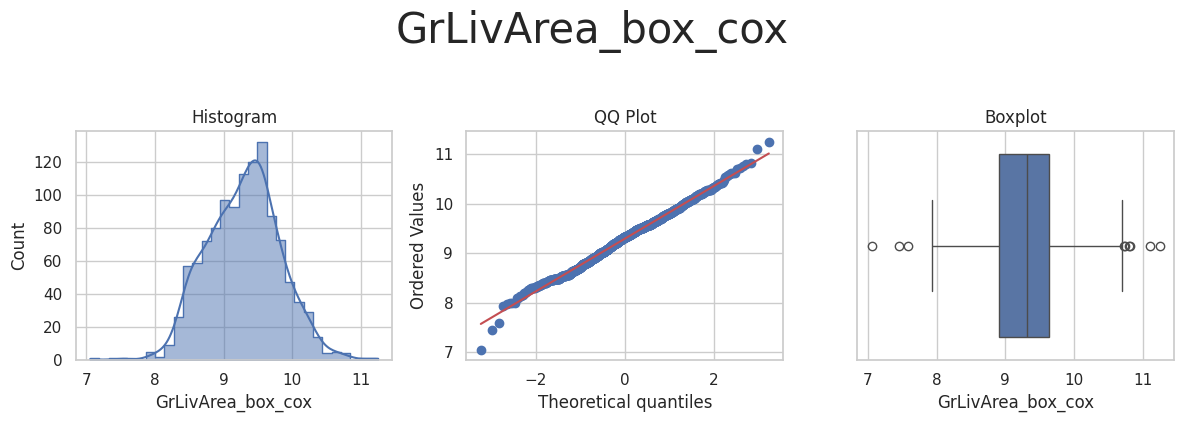

{'GrLivArea_box_cox'}  | skewness: 0.0 | kurtosis: 0.15




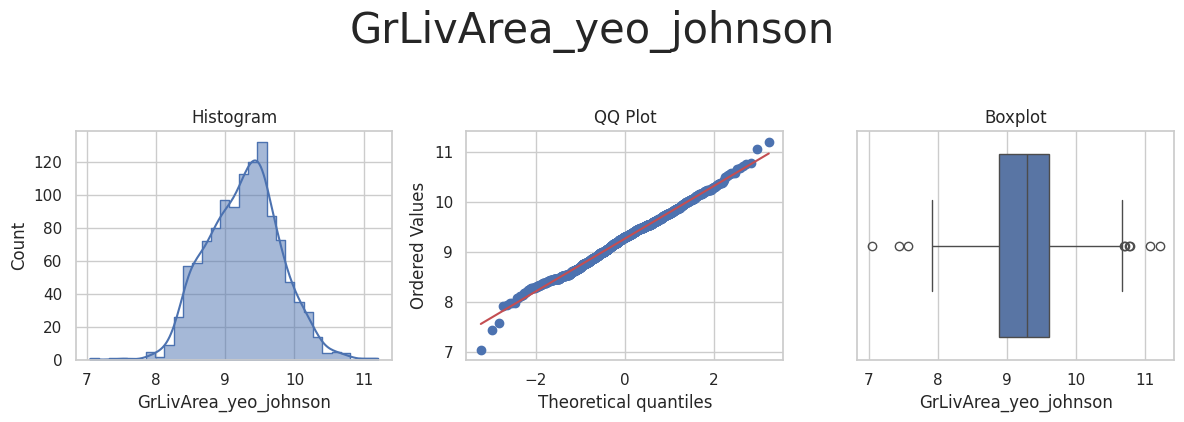

{'GrLivArea_yeo_johnson'}  | skewness: 0.0 | kurtosis: 0.15


* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_power', 'GarageArea_yeo_johnson'] 



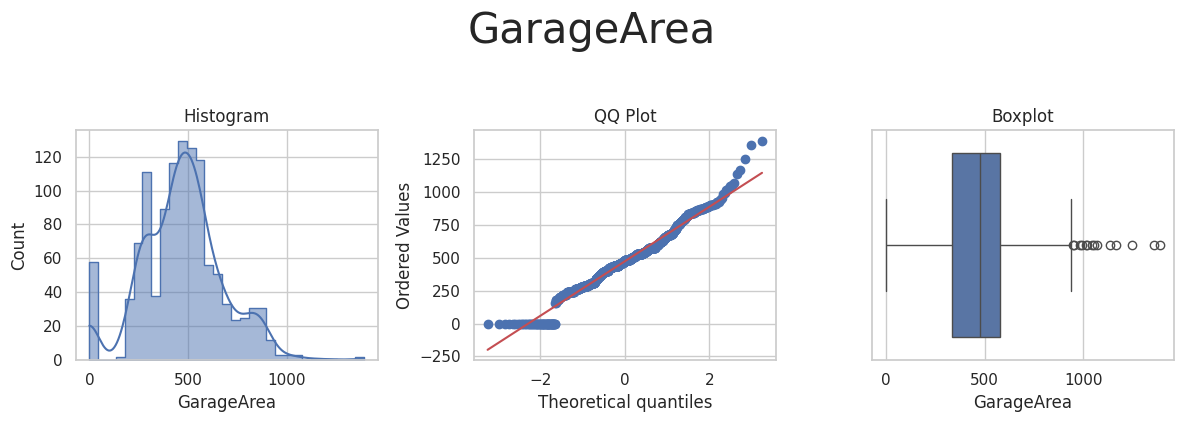

{'GarageArea'}  | skewness: 0.17 | kurtosis: 0.83




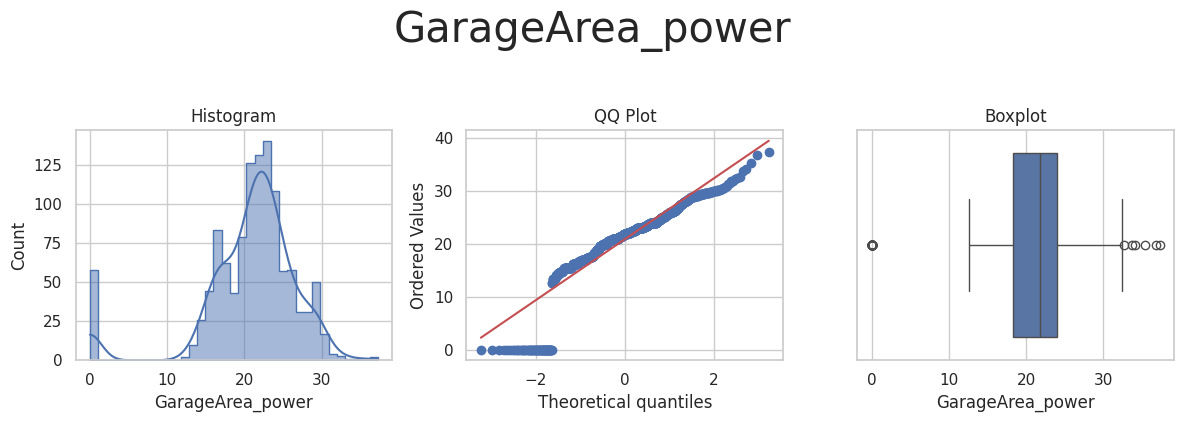

{'GarageArea_power'}  | skewness: -1.61 | kurtosis: 4.01




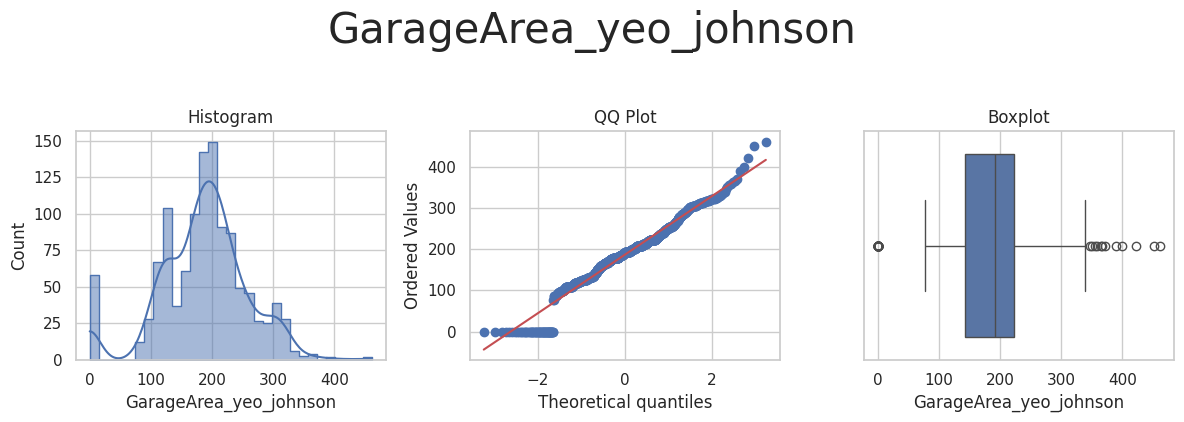

{'GarageArea_yeo_johnson'}  | skewness: -0.29 | kurtosis: 1.01


* Variable Analyzed: YearBuilt
* Applied transformation: ['YearBuilt_log_e', 'YearBuilt_log_10', 'YearBuilt_reciprocal', 'YearBuilt_power', 'YearBuilt_box_cox', 'YearBuilt_yeo_johnson'] 



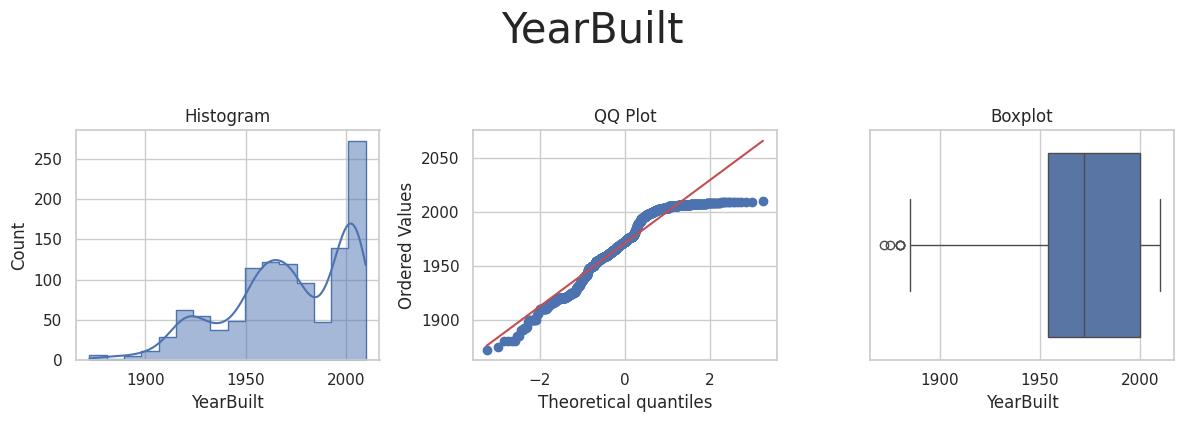

{'YearBuilt'}  | skewness: -0.61 | kurtosis: -0.43




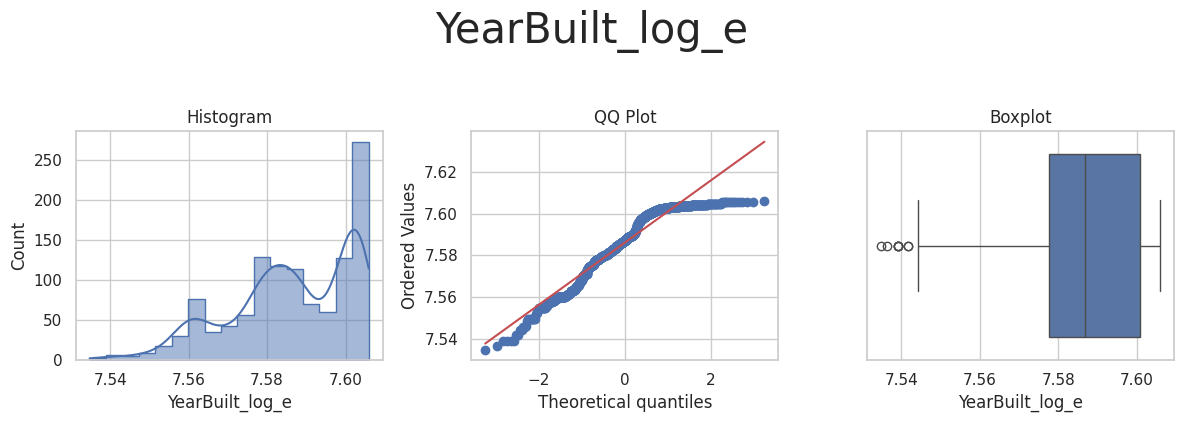

{'YearBuilt_log_e'}  | skewness: -0.64 | kurtosis: -0.37




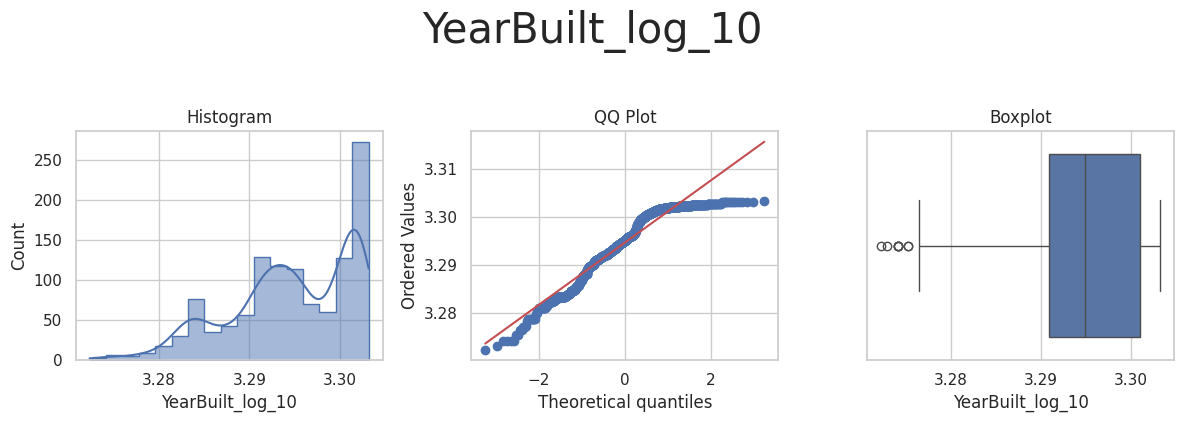

{'YearBuilt_log_10'}  | skewness: -0.64 | kurtosis: -0.37




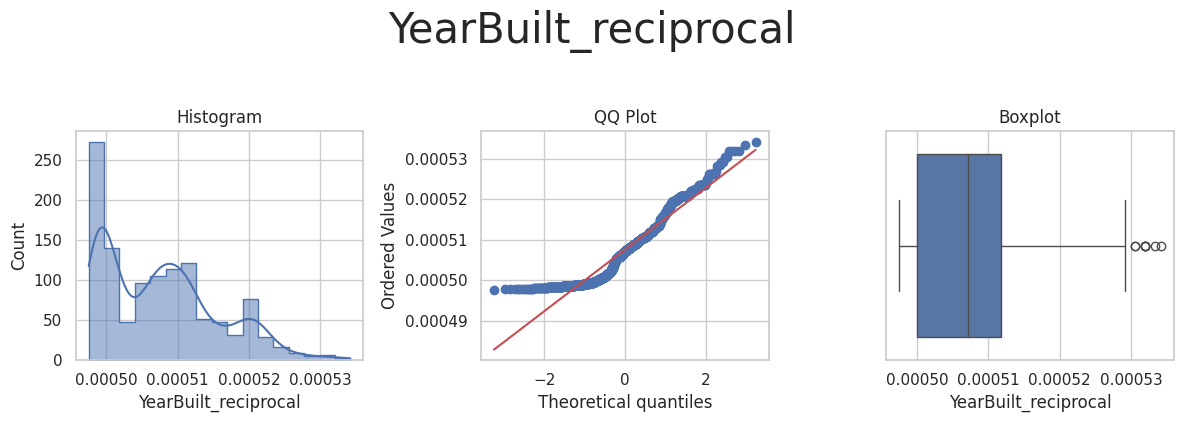

{'YearBuilt_reciprocal'}  | skewness: 0.67 | kurtosis: -0.3




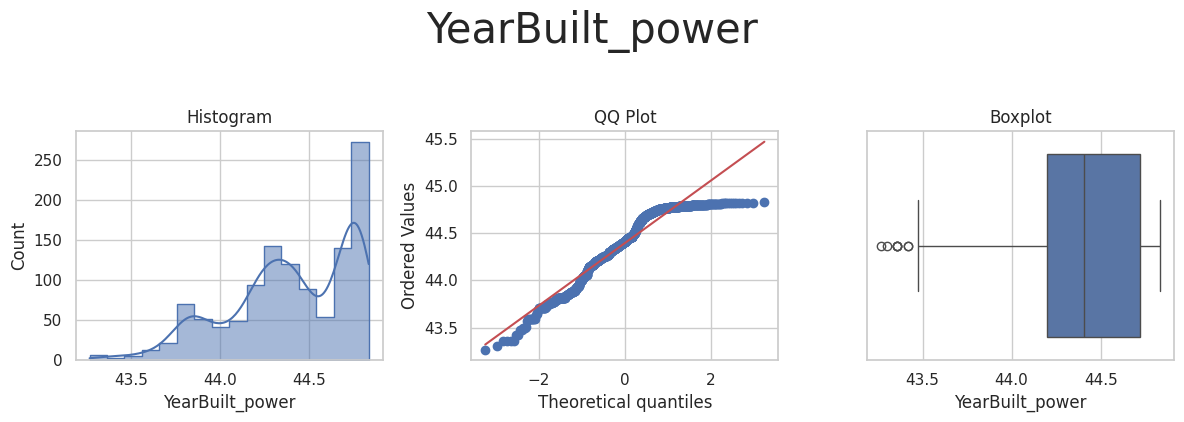

{'YearBuilt_power'}  | skewness: -0.63 | kurtosis: -0.4




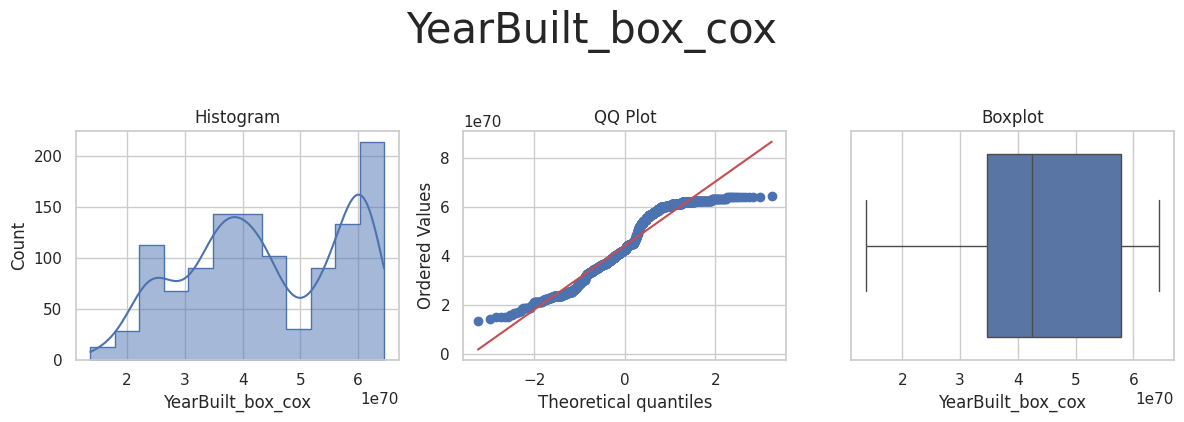

{'YearBuilt_box_cox'}  | skewness: -0.13 | kurtosis: -1.19




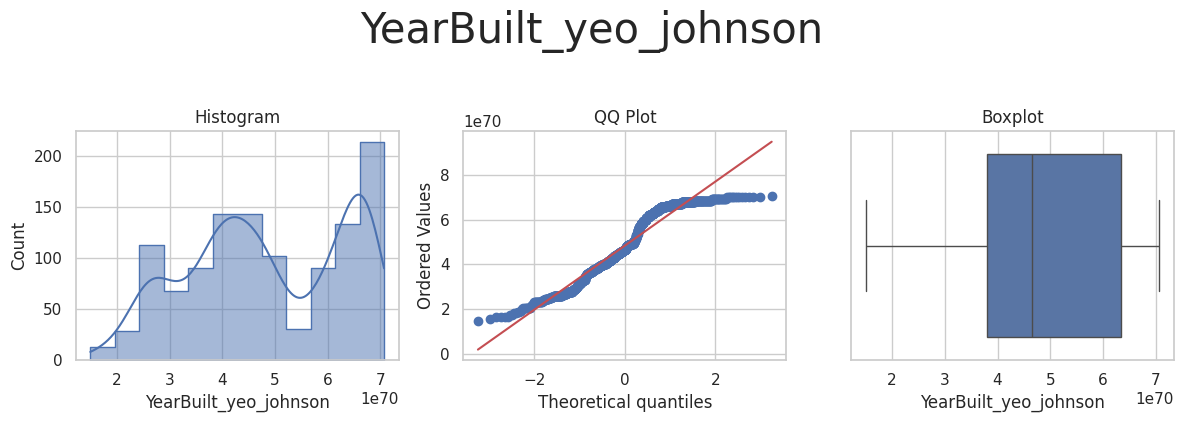

{'YearBuilt_yeo_johnson'}  | skewness: -0.13 | kurtosis: -1.19


* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson'] 



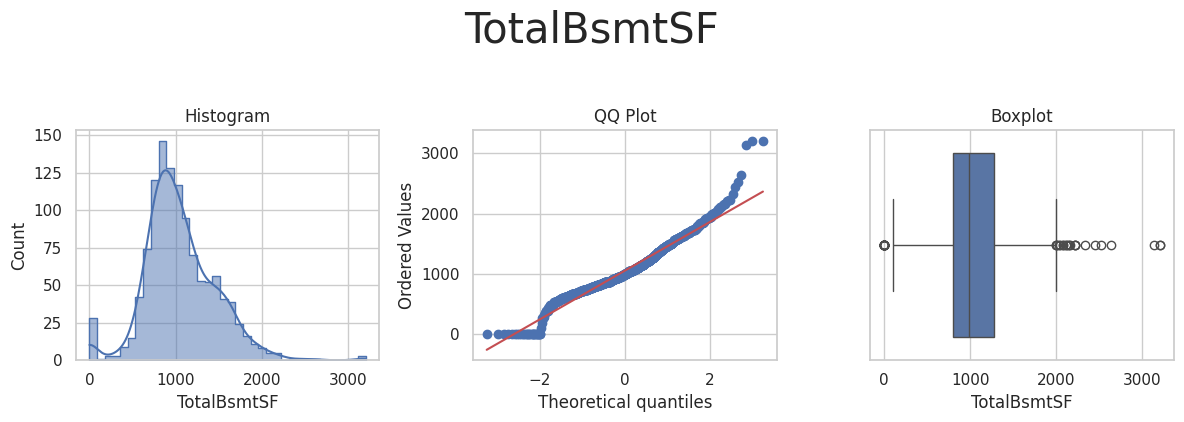

{'TotalBsmtSF'}  | skewness: 0.59 | kurtosis: 2.17




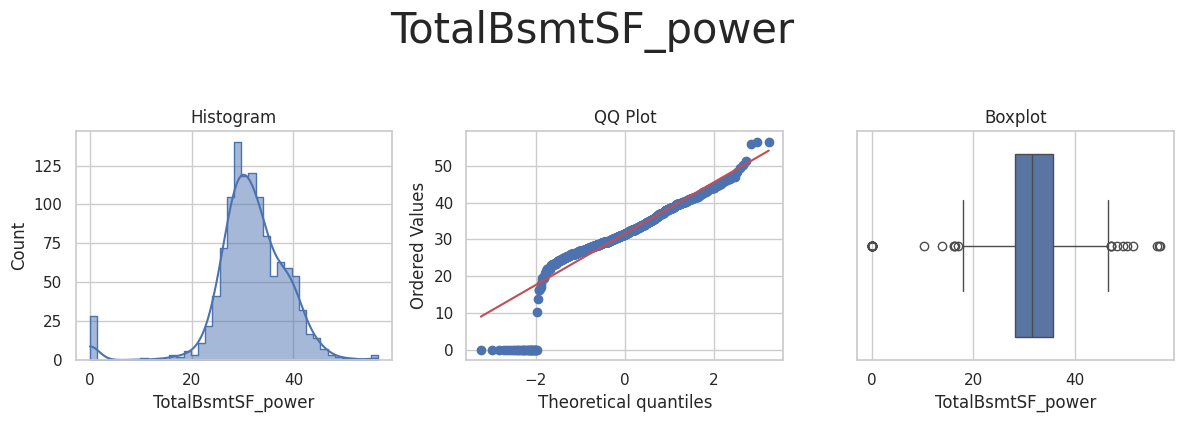

{'TotalBsmtSF_power'}  | skewness: -1.48 | kurtosis: 6.06




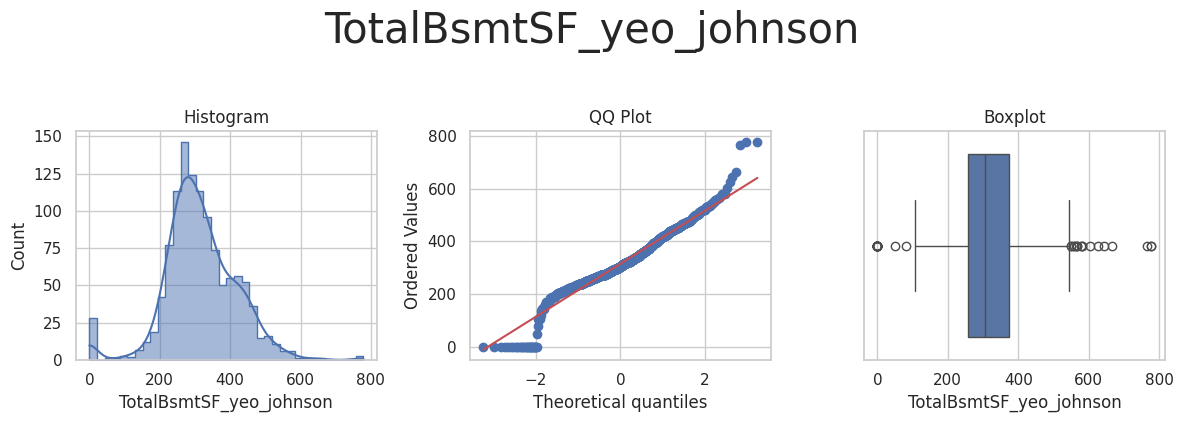

{'TotalBsmtSF_yeo_johnson'}  | skewness: 0.01 | kurtosis: 2.06


* Variable Analyzed: GarageYrBlt
* Applied transformation: ['GarageYrBlt_power', 'GarageYrBlt_yeo_johnson'] 



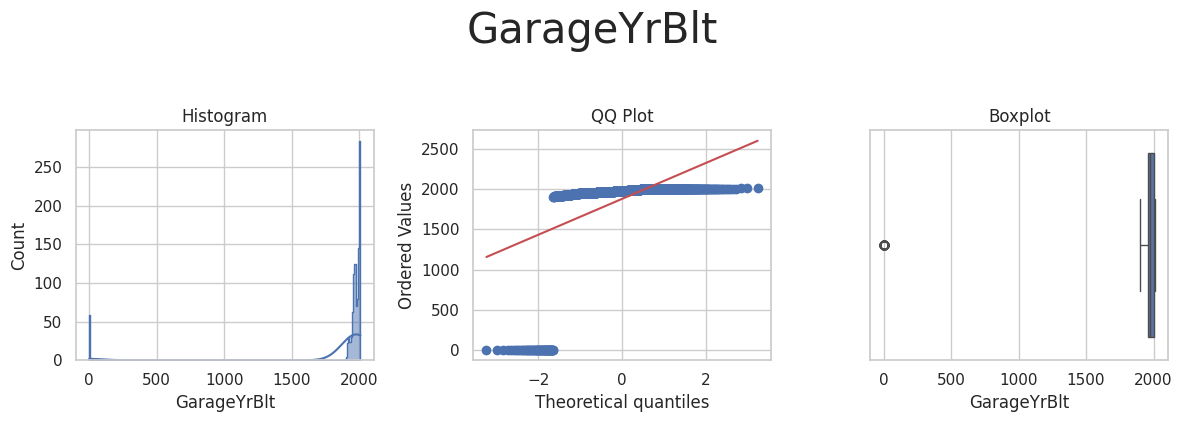

{'GarageYrBlt'}  | skewness: -4.13 | kurtosis: 15.15




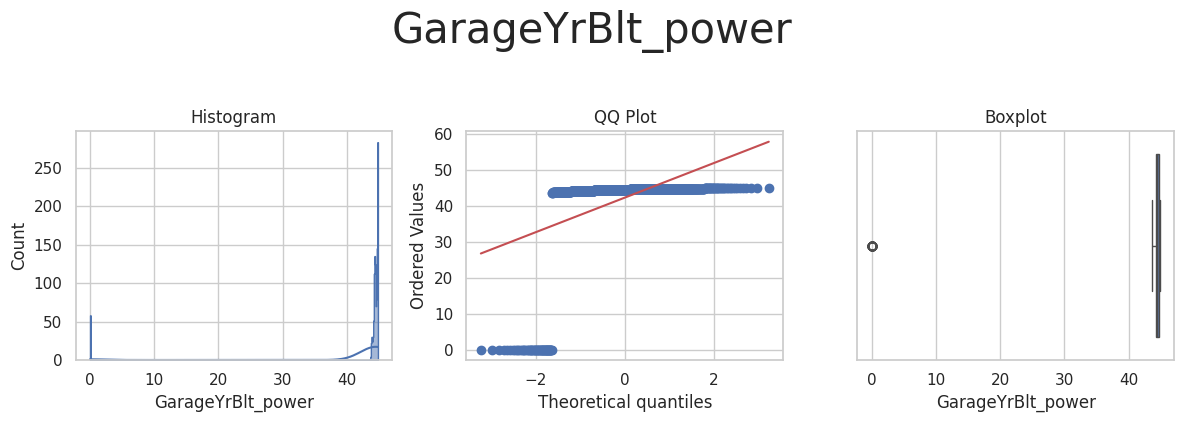

{'GarageYrBlt_power'}  | skewness: -4.15 | kurtosis: 15.23




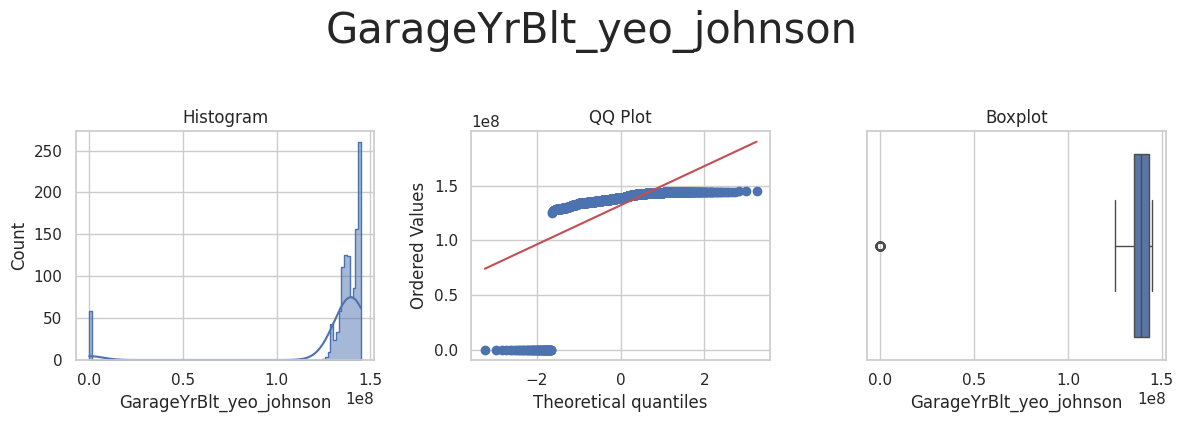

{'GarageYrBlt_yeo_johnson'}  | skewness: -4.01 | kurtosis: 14.52


* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



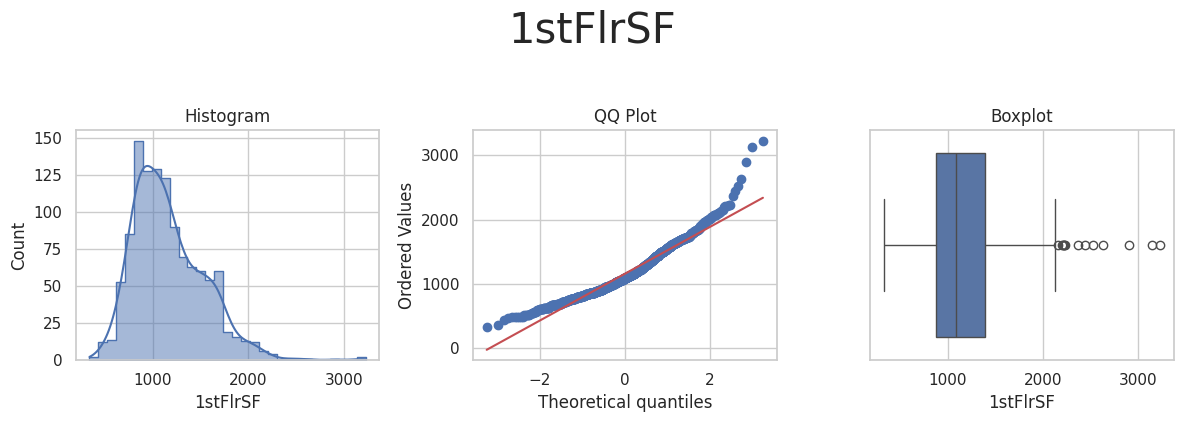

{'1stFlrSF'}  | skewness: 0.96 | kurtosis: 1.69




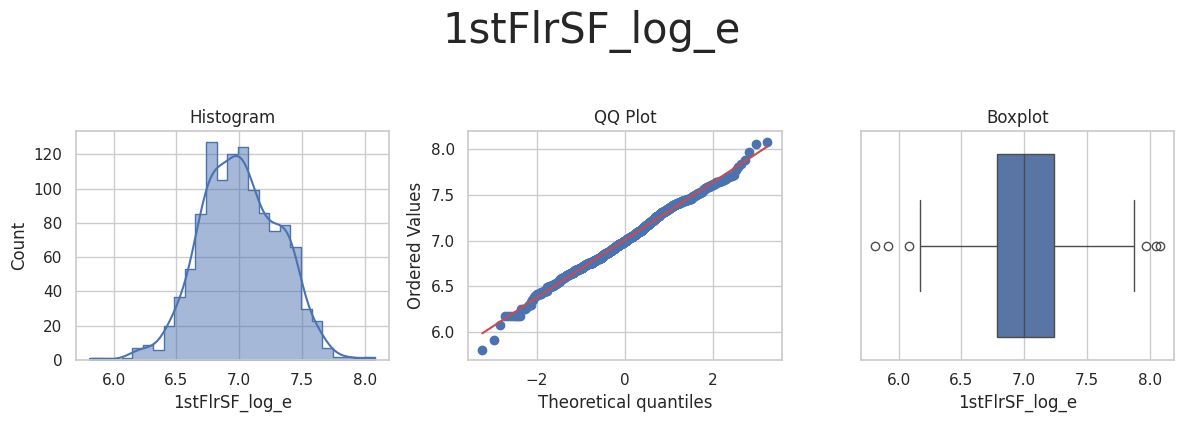

{'1stFlrSF_log_e'}  | skewness: -0.0 | kurtosis: 0.01




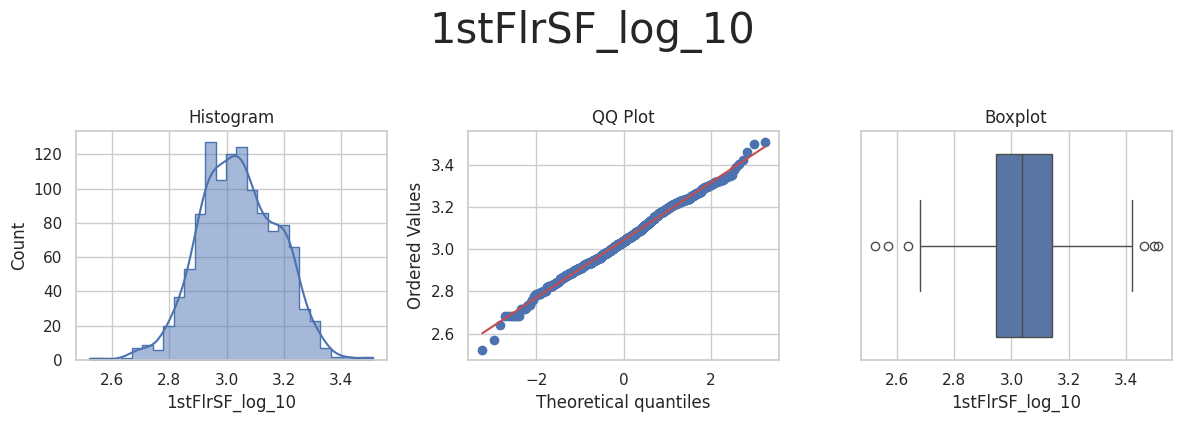

{'1stFlrSF_log_10'}  | skewness: -0.0 | kurtosis: 0.01




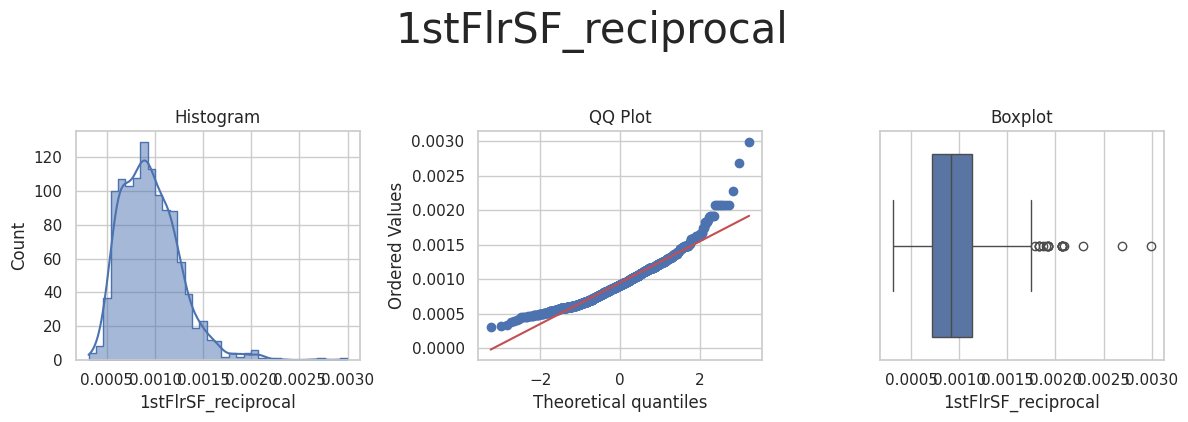

{'1stFlrSF_reciprocal'}  | skewness: 1.13 | kurtosis: 3.15




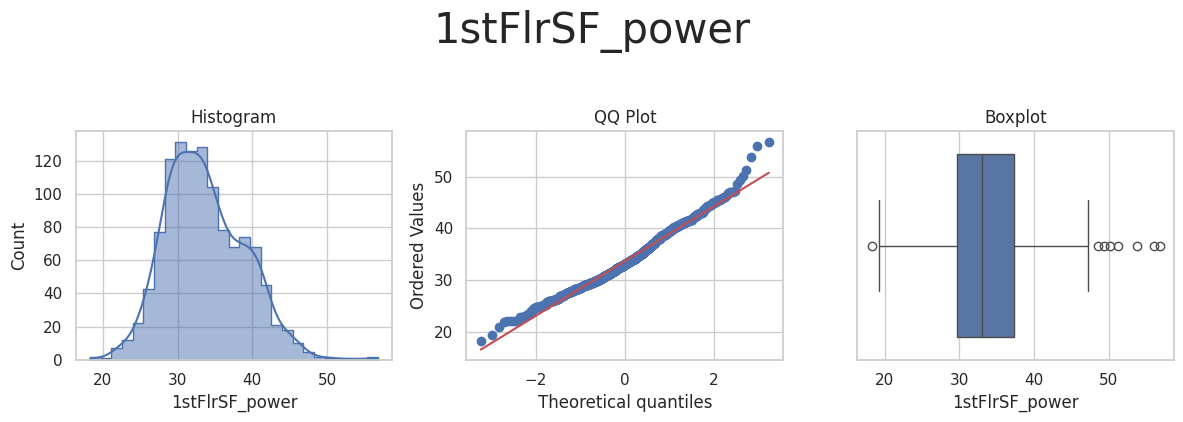

{'1stFlrSF_power'}  | skewness: 0.46 | kurtosis: 0.3




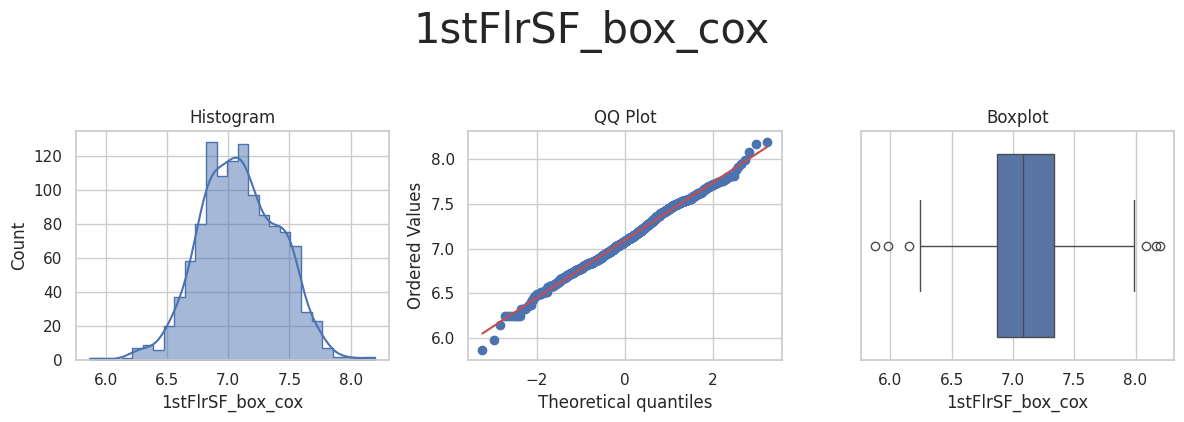

{'1stFlrSF_box_cox'}  | skewness: 0.0 | kurtosis: 0.01




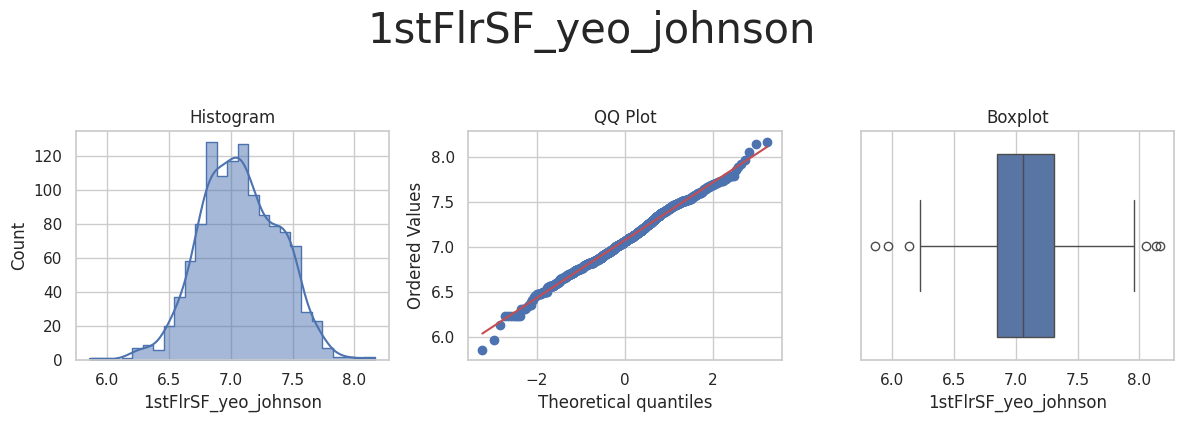

{'1stFlrSF_yeo_johnson'}  | skewness: 0.0 | kurtosis: 0.01


* Variable Analyzed: YearRemodAdd
* Applied transformation: ['YearRemodAdd_log_e', 'YearRemodAdd_log_10', 'YearRemodAdd_reciprocal', 'YearRemodAdd_power', 'YearRemodAdd_box_cox', 'YearRemodAdd_yeo_johnson'] 



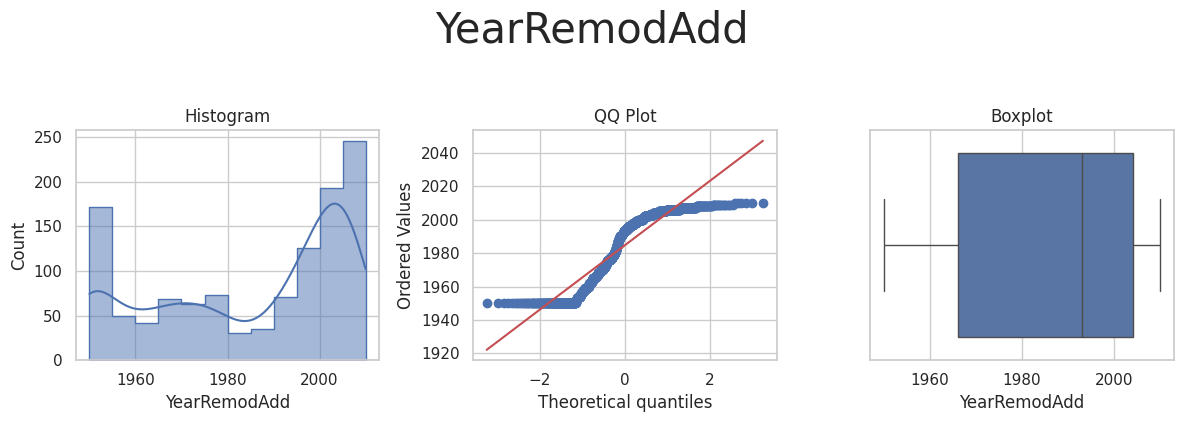

{'YearRemodAdd'}  | skewness: -0.49 | kurtosis: -1.29




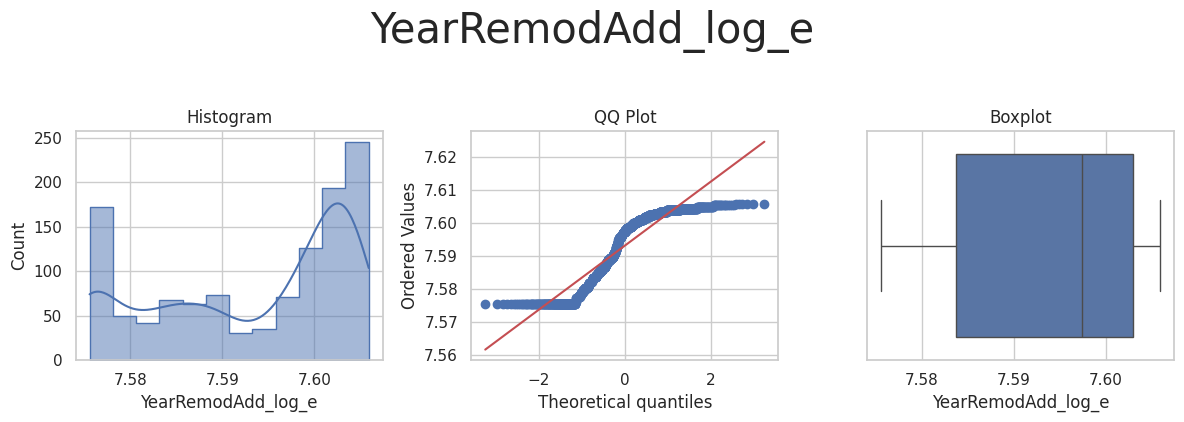

{'YearRemodAdd_log_e'}  | skewness: -0.5 | kurtosis: -1.28




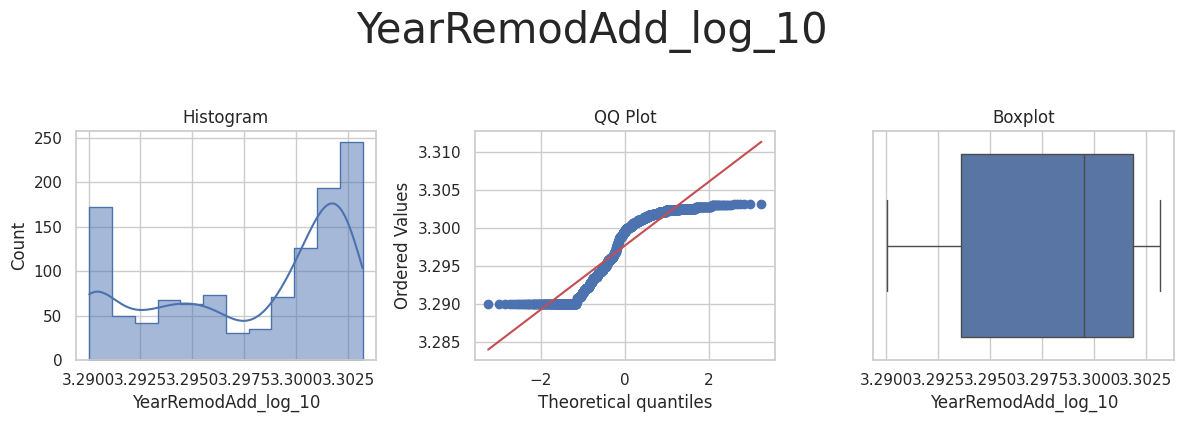

{'YearRemodAdd_log_10'}  | skewness: -0.5 | kurtosis: -1.28




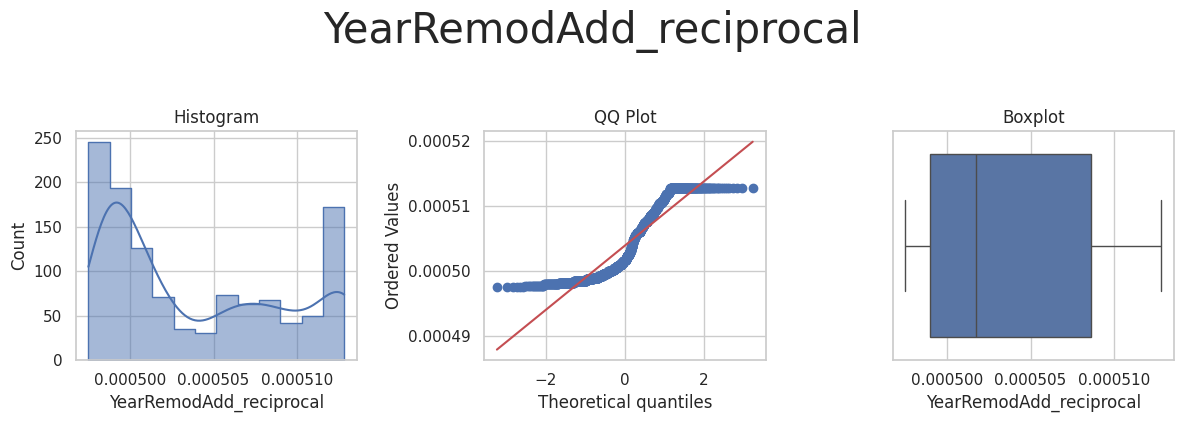

{'YearRemodAdd_reciprocal'}  | skewness: 0.51 | kurtosis: -1.27




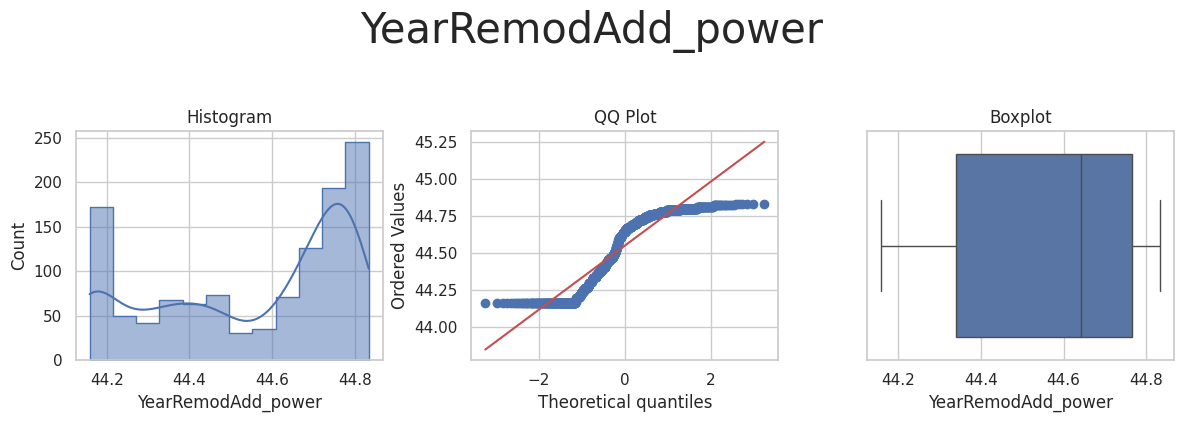

{'YearRemodAdd_power'}  | skewness: -0.5 | kurtosis: -1.28




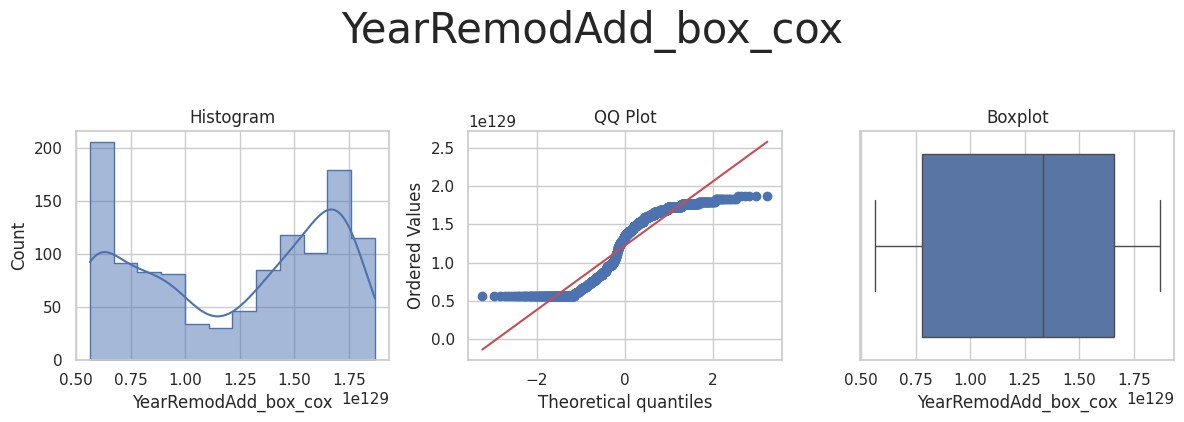

{'YearRemodAdd_box_cox'}  | skewness: nan | kurtosis: nan




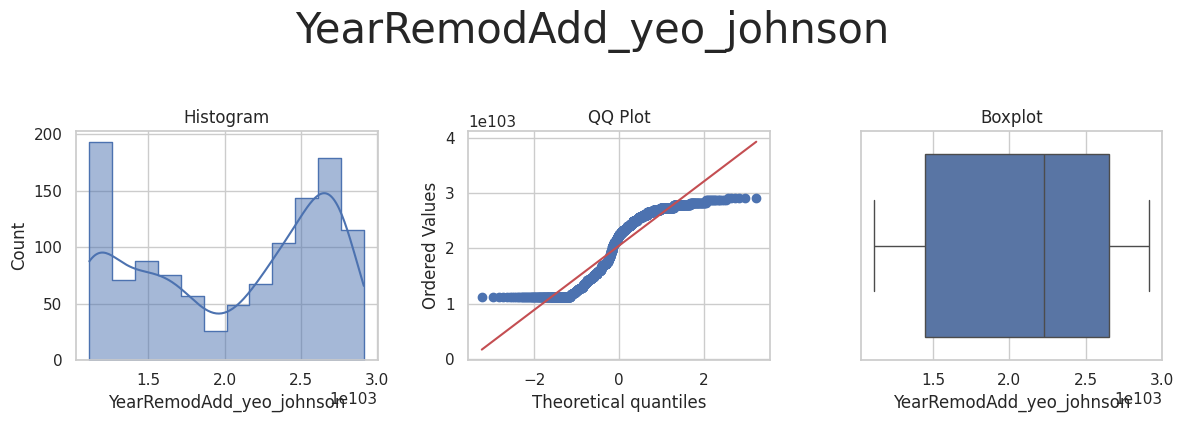

{'YearRemodAdd_yeo_johnson'}  | skewness: nan | kurtosis: nan




In [20]:
df_eng = FeatureEngineeringAnalysis(df=df_eng, analysis_type='numerical')

Each numerical variable was evaluated across multiple transformation methods using three visual diagnostics:

* Histogram: checked for symmetry and bell-shaped distribution

* QQ Plot: checked alignment with the diagonal (indicating normality)

* Boxplot: checked for outlier compression and spread

We also observe the difference in skewness and kurtosis from original and transformed variables.

We selected the transformation that reduced skewness and kurtosis, and yielded the best visual improvement while preserving interpretability. 

Below is a summary of the selected transformations:


| Variable | Transformation chosen | Reason |
|-----|-----|-----|
| OverallQual | yeo_johnson | Kurtosis and Skwenes improved after transformations |
| GrLivArea | yeo_johnson | Kurtosis and Skwenes improved after transformations |
| GarageArea | yeo_johnson | Kurtosis and Skwenes improved after transformations |
| YearBuilt | reciprocal | Visual improvement on the QQ plot, the blue dots following the red line. |
| TotalBsmtSF | yeo_johnson | Kurtosis and Skwenes improved after transformations |
| GarageYrBlt | None | Not good improvements|
| 1stFlrSF | yeo_johnson | Kurtosis and Skwenes improved after transformations |
| YearRemodAdd | None | Not good improvements |


In [22]:
yJt = vt.YeoJohnsonTransformer(variables=['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'])

rt = vt.ReciprocalTransformer(variables='YearBuilt')

transfomers = [yJt, rt]
for t in transfomers:
    TrainSet = t.fit_transform(TrainSet)
    TestSet = t.fit_transform(TestSet)
print("* Numerical transformation done!")

* Numerical transformation done!


**Winsoriser**

* We use winsoriser instead of trimmer, to retain the observations in the data while minimizing their impact on the prediction.

In [26]:
vars_eng = ['OverallQual','GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'YearRemodAdd']

In [27]:
df_eng = TrainSet[vars_eng].copy()
df_eng.head(10)

OverallQual  GrLivArea  GarageArea  YearBuilt  TotalBsmtSF  GarageYrBlt  \
0     6.484417   9.643831  285.045684   0.000498   495.850405         2007   
1     3.922905   8.514205  133.391158   0.000510   280.785345         1962   
2     3.922905   8.630808  176.328984   0.000521   276.257150         1921   
3     5.868984   9.516347  309.970732   0.000500   439.843440         2002   
4     5.238591   9.369334  305.797981   0.000500   433.785699         2001   
5     5.238591   9.000080  165.488440   0.000499   360.202553         2004   
6     4.590920   9.127928  179.016303   0.000509   328.498994         1965   
7     5.238591   9.234488  193.645207   0.000500   229.846254         1999   
8     3.230312   8.668969  129.446285   0.000507   165.575378         1973   
9     4.590920   8.996207  179.016303   0.000515   240.090515         2003   

   1stFlrSF  YearRemodAdd  
0  7.585314          2007  
1  6.857202          1962  
2  6.933855          2006  
3  7.504723          2002  
4  7.411299          2002  
5  7.174300          2005  
6  7.256740          1965  
7  6.602791          1999  
8  6.318512          1973  
9  6.828367          1950

* Apply the transformation and assess the distributions

* Variable Analyzed: OverallQual
* Applied transformation: ['OverallQual_iqr'] 



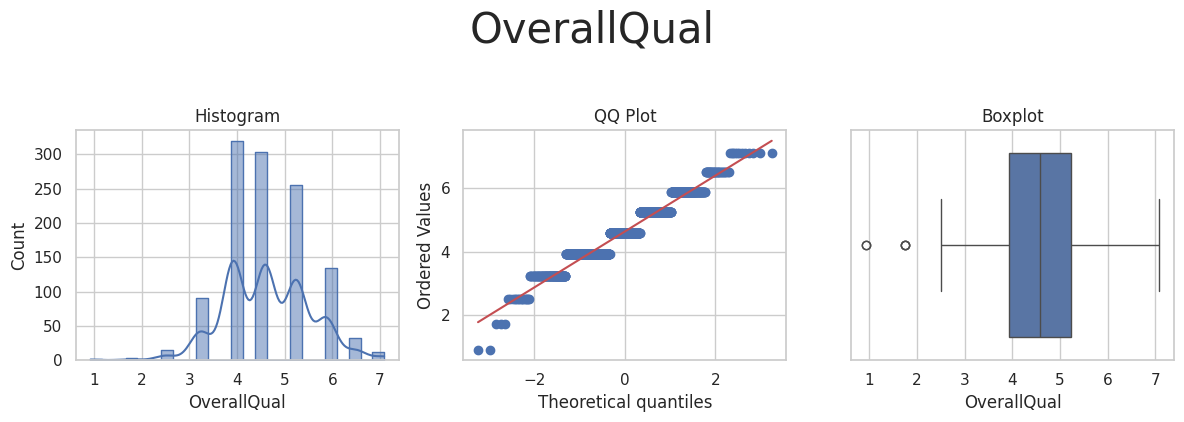

{'OverallQual'}  | skewness: 0.02 | kurtosis: 0.28




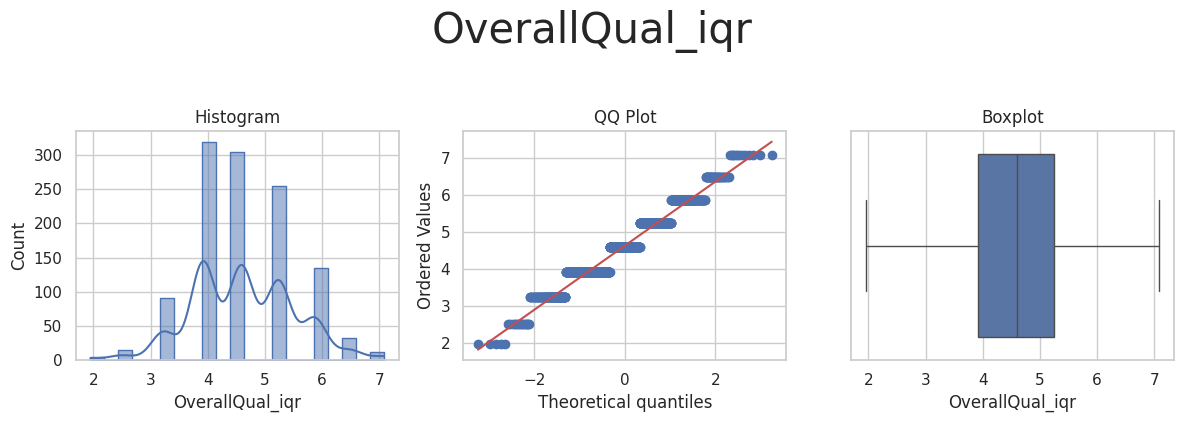

{'OverallQual_iqr'}  | skewness: 0.11 | kurtosis: -0.05


* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_iqr'] 



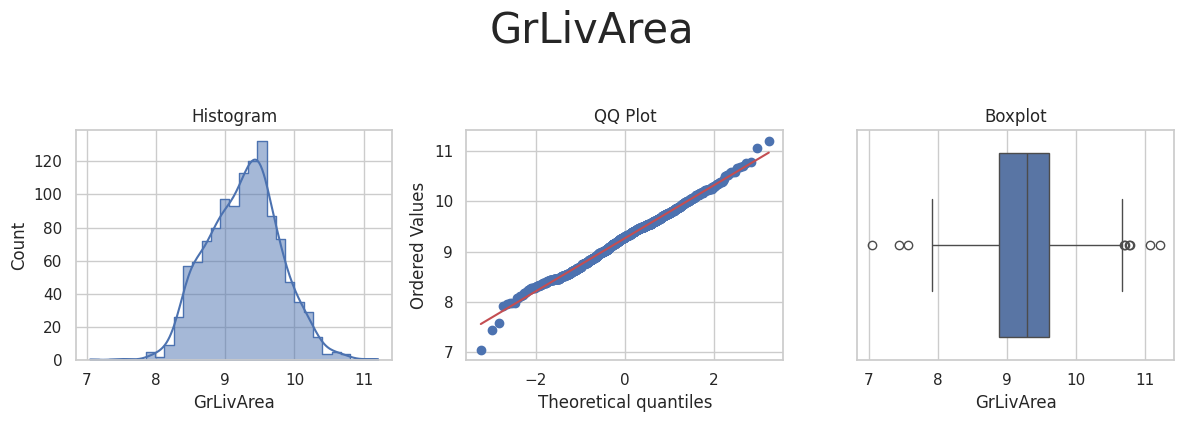

{'GrLivArea'}  | skewness: 0.0 | kurtosis: 0.15




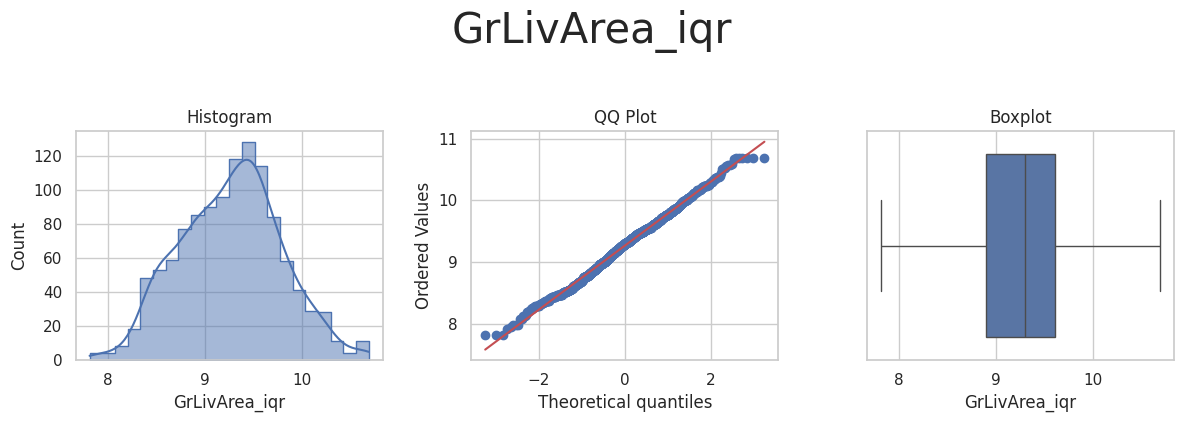

{'GrLivArea_iqr'}  | skewness: 0.02 | kurtosis: -0.26


* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_iqr'] 



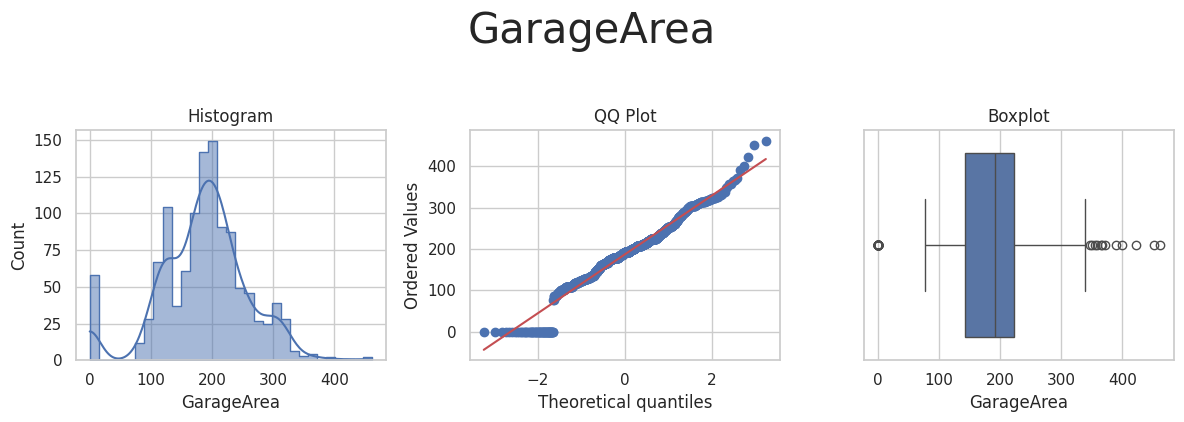

{'GarageArea'}  | skewness: -0.29 | kurtosis: 1.01




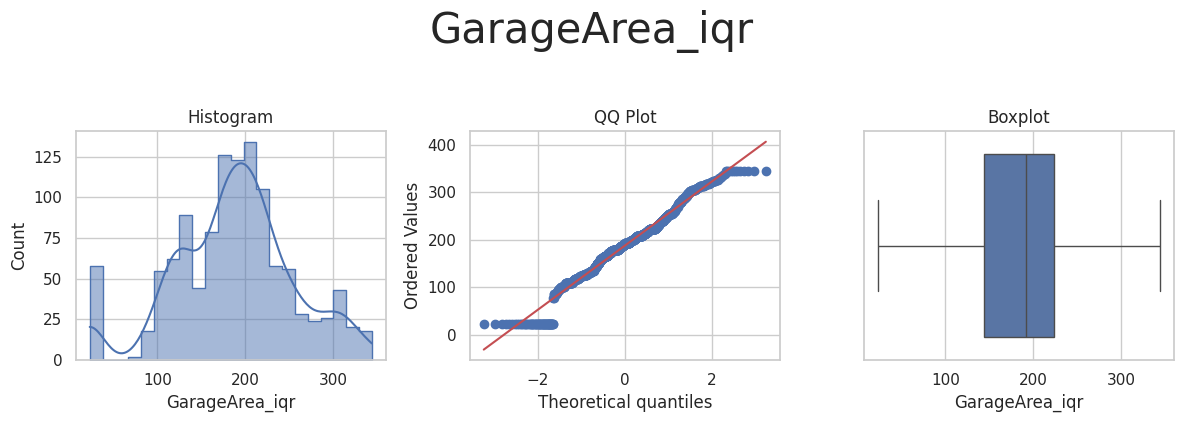

{'GarageArea_iqr'}  | skewness: -0.21 | kurtosis: 0.26


* Variable Analyzed: YearBuilt
* Applied transformation: ['YearBuilt_iqr'] 



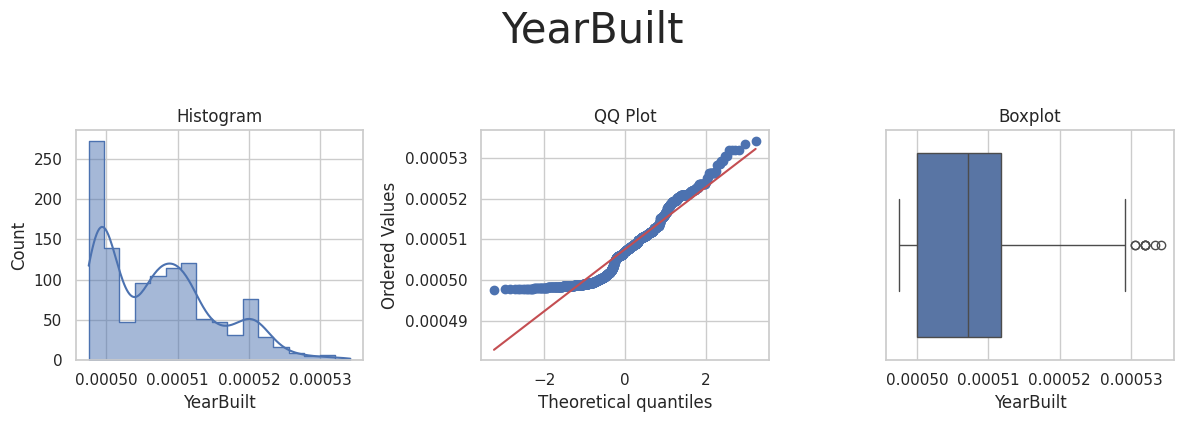

{'YearBuilt'}  | skewness: 0.67 | kurtosis: -0.3




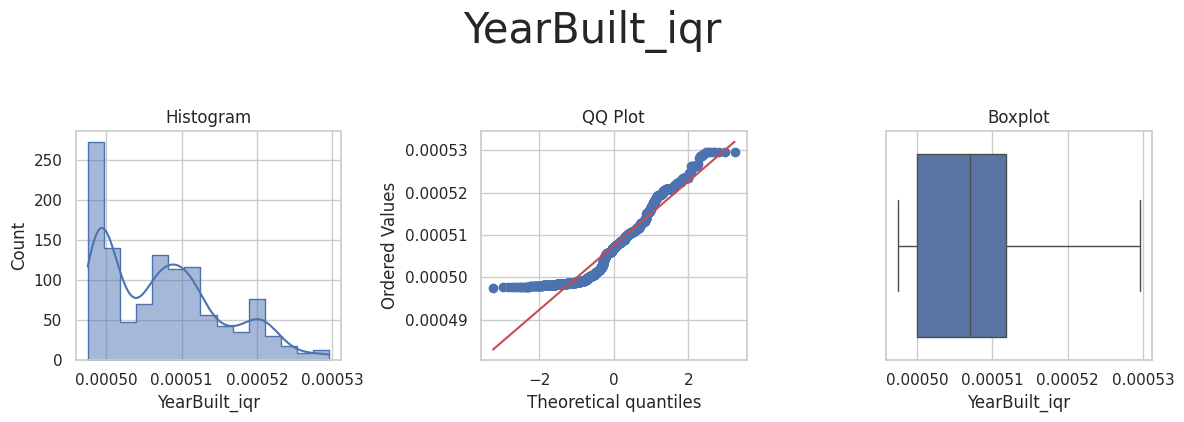

{'YearBuilt_iqr'}  | skewness: 0.63 | kurtosis: -0.46


* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_iqr'] 



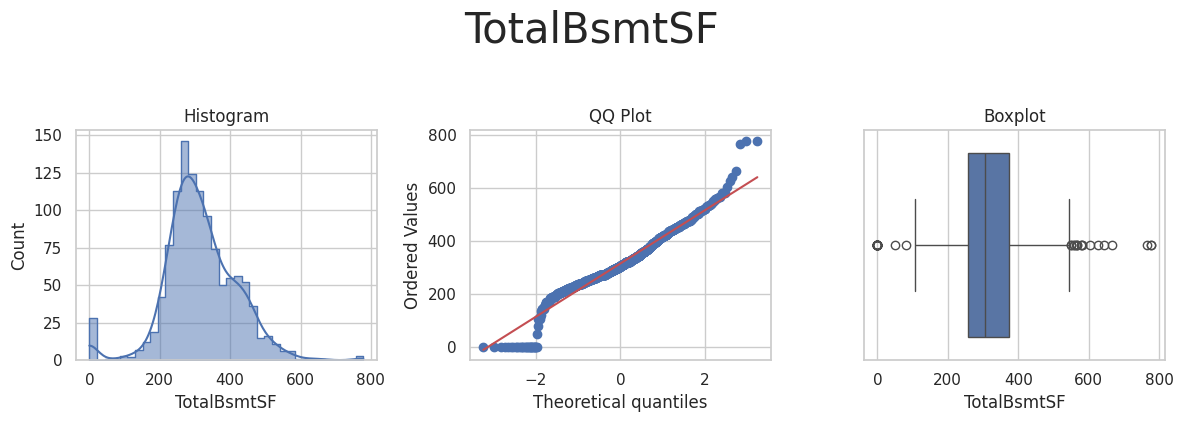

{'TotalBsmtSF'}  | skewness: 0.01 | kurtosis: 2.06




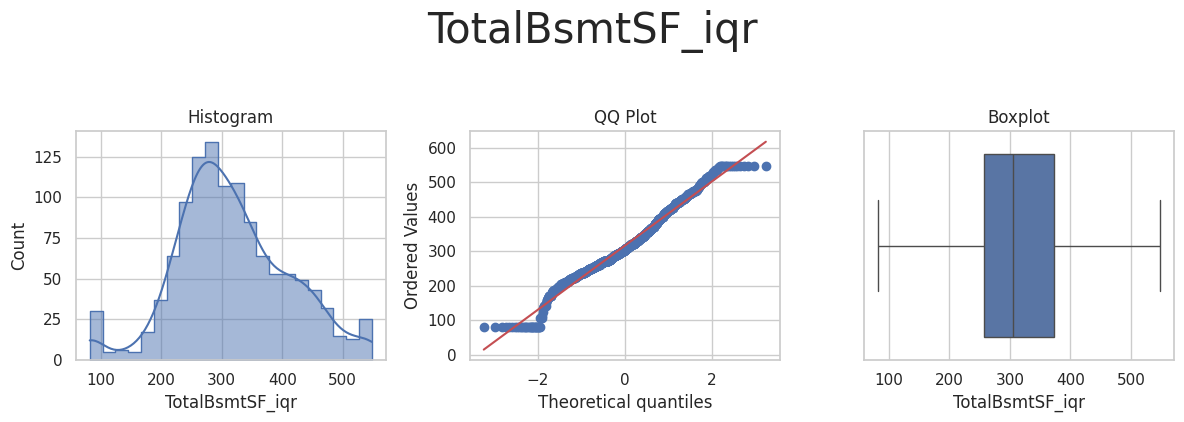

{'TotalBsmtSF_iqr'}  | skewness: 0.16 | kurtosis: 0.19


* Variable Analyzed: GarageYrBlt
* Applied transformation: ['GarageYrBlt_iqr'] 



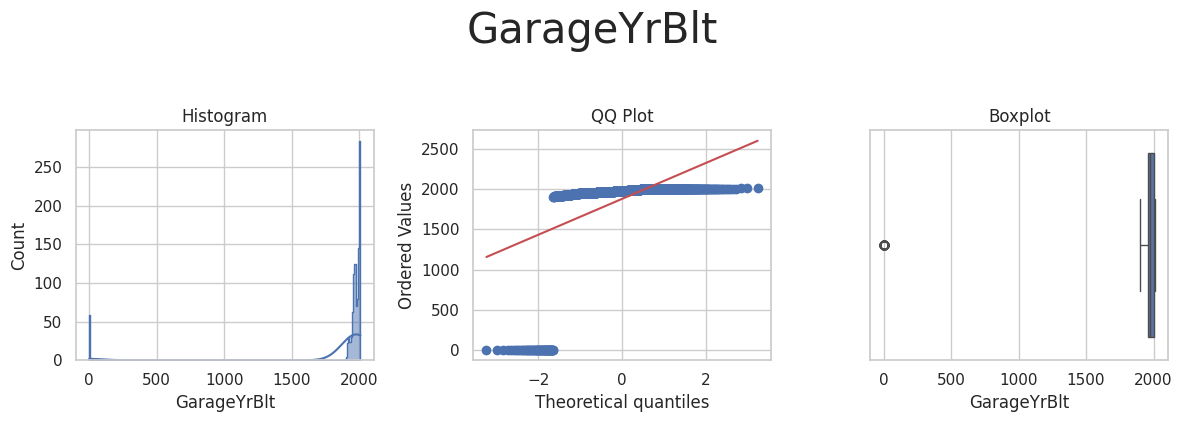

{'GarageYrBlt'}  | skewness: -4.13 | kurtosis: 15.15




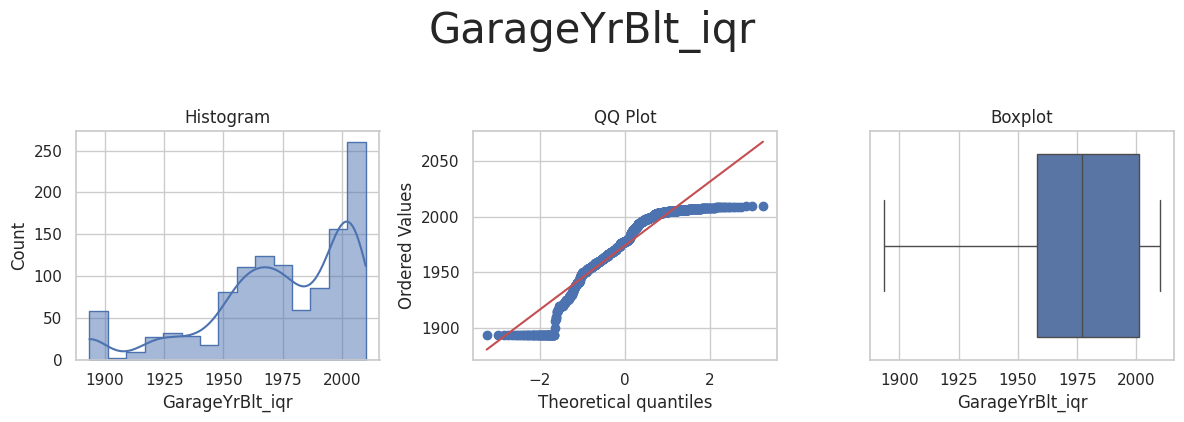

{'GarageYrBlt_iqr'}  | skewness: -0.99 | kurtosis: 0.41


* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_iqr'] 



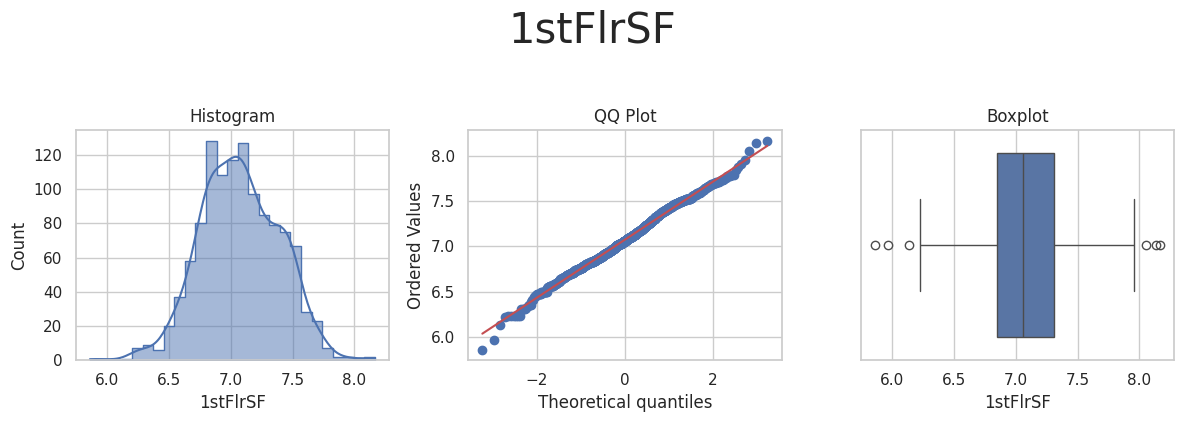

{'1stFlrSF'}  | skewness: 0.0 | kurtosis: 0.01




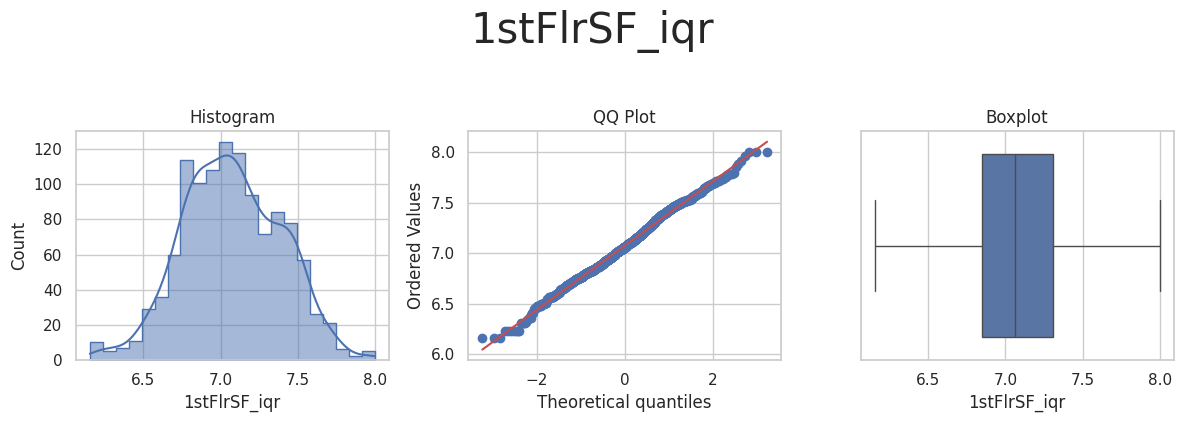

{'1stFlrSF_iqr'}  | skewness: 0.01 | kurtosis: -0.22


* Variable Analyzed: YearRemodAdd
* Applied transformation: ['YearRemodAdd_iqr'] 



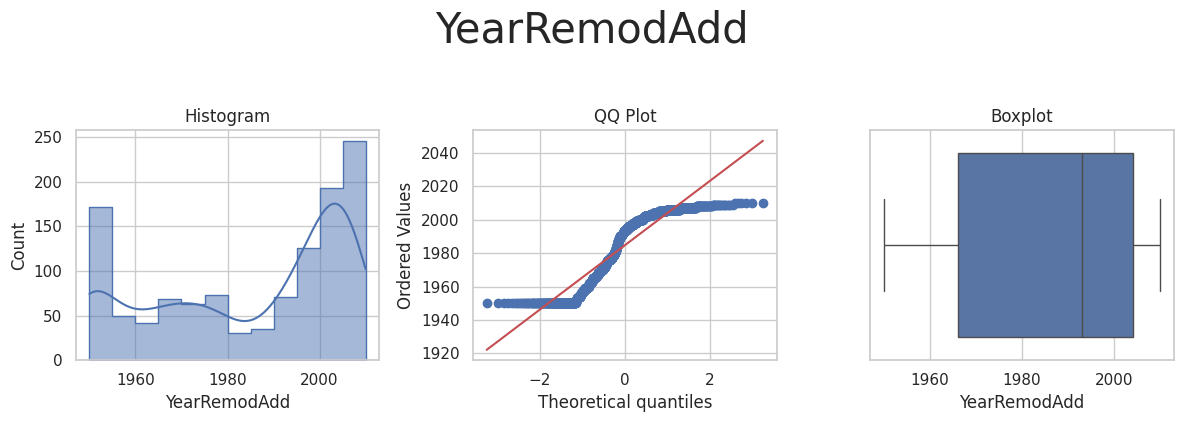

{'YearRemodAdd'}  | skewness: -0.49 | kurtosis: -1.29




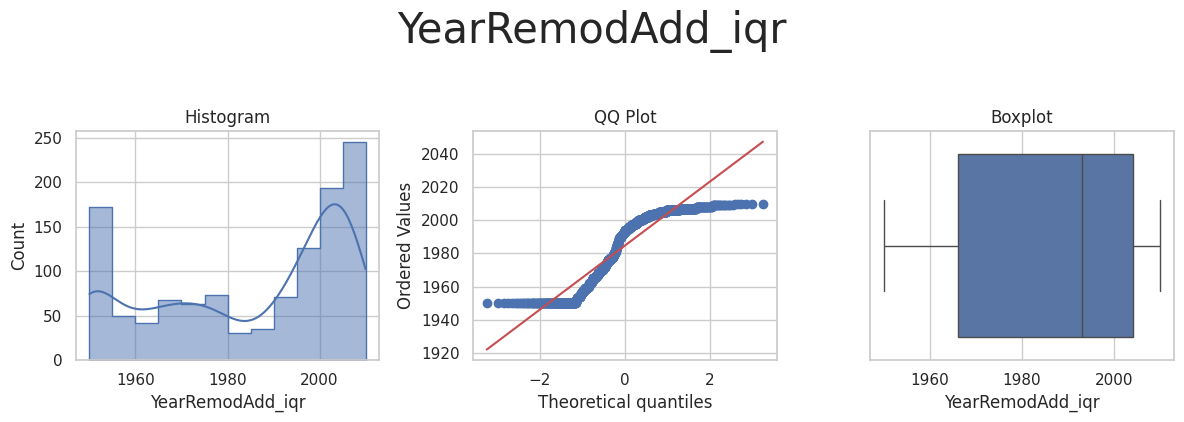

{'YearRemodAdd_iqr'}  | skewness: -0.49 | kurtosis: -1.29




In [28]:
df_eng = FeatureEngineeringAnalysis(df=df_eng, analysis_type='outlier_winsorizer')

* We apply the winsoriser to the train and test datasets.

In [29]:
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables = vars_eng)
TrainSet = winsoriser.fit_transform(TrainSet)
TestSet = winsoriser.fit_transform(TestSet)

print("* Outlier winsoriser transformation done!")

* Outlier winsoriser transformation done!


#### SmartCorrelatedSelection Variables

* Remove highly correlated variables (correlation > 0.8) based on their variance, stores the correlated feature sets in corr_sel.correlated_feature_sets_

In [30]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.8, selection_method="variance")

corr_sel.fit_transform(df_eng)
corr_sel.correlated_feature_sets_

[{'OverallQual', 'OverallQual_iqr'},
 {'GrLivArea', 'GrLivArea_iqr'},
 {'GarageArea', 'GarageArea_iqr'},
 {'GarageYrBlt', 'GarageYrBlt_iqr', 'YearBuilt', 'YearBuilt_iqr'},
 {'1stFlrSF', '1stFlrSF_iqr', 'TotalBsmtSF', 'TotalBsmtSF_iqr'},
 {'YearRemodAdd', 'YearRemodAdd_iqr'}]

* The names of variables that are dropped due to high correlation with others.

In [31]:
corr_sel.features_to_drop_

['OverallQual_iqr',
 'GrLivArea_iqr',
 'GarageArea_iqr',
 'YearBuilt',
 'YearBuilt_iqr',
 'TotalBsmtSF_iqr',
 'GarageYrBlt_iqr',
 '1stFlrSF',
 '1stFlrSF_iqr',
 'YearRemodAdd_iqr']

## Conclusions and Next Steps

We applied Feature Engineering Transformers on :

* Categorical variables using Ordinal Encoding on ```BsmtExposure```, ```BsmtFinType1```, ```GarageFinish```, ```KitchenQual```.

* Numerical transformation: ```OverallQual```,```GrLivArea```, ```GarageArea```, ```YearBuilt```, ```TotalBsmtSF```, ```GarageYrBlt```, ```1stFlrSF```, ```YearRemodAdd```.

* Outlier winsoriser: ```OverallQual```,```GrLivArea```, ```GarageArea```, ```YearBuilt```, ```TotalBsmtSF```, ```GarageYrBlt```, ```1stFlrSF```, ```YearRemodAdd```, to stabilize variance and make relationships with the target variable more linear.

In order to forecast the sale price of inherited homes and other properties in the area, we will next train a machine learning regression model.
